<a href="https://colab.research.google.com/github/hruday377363/Nan_mudhalvan-Datascienceproject_marginalworkers/blob/main/NM_PHASE_2_INNOVATION_MARGINAL_WORKERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('marginal_workers_tamil_nadu.csv.csv')

# Assuming df is your DataFrame and 'Age group' is the column you want to clean
df['Age group'] = df['Age group'].str.replace('`', '')
df

,Table Code,State Code,District Code,Area Name,Total/ Rural/ Urban,Age group,Worked for 3 months or more but less than 6 months - Persons,Worked for 3 months or more but less than 6 months - Males,Worked for 3 months or more but less than 6 months - Females,Worked for less than 3 months - Persons,...,Industrial Category - N to O - Females,Industrial Category - P to Q - Persons,Industrial Category - P to Q - Males,Industrial Category - P to Q - Females,Industrial Category - R to U - HHI - Persons,Industrial Category - R to U - HHI - Males,Industrial Category - R to U - HHI - Females,Industrial Category - R to U - Non HHI - Persons,Industrial Category - R to U - Non HHI - Males,Industrial Category - R to U - Non HHI - Females
0,B0706,`33,`000,State - TAMIL NADU,Total,Total,4218884,2136881,2082003,723891,...,14495,58788,19892,38896,89703,21366,68337,625350,274811,350539
1,B0706,`33,`000,State - TAMIL NADU,Total,5-9,48238,24511,23727,2051,...,20,312,169,143,842,386,456,40358,20664,19694
2,B0706,`33,`000,State - TAMIL NADU,Total,10-14,76288,39191,37097,6993,...,44,506,256,250,1523,576,947,53900,27501,26399
3,B0706,`33,`000,State - TAMIL NADU,Total,15-19,257605,141262,116343,41938,...,768,2114,695,1419,5349,2065,3284,89780,46737,43043
4,B0706,`33,`000,State - TAMIL NADU,Total,20-24,478082,257149,220933,81036,...,2267,11529,2861,8668,10653,2478,8175,109641,54832,54809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,B0706,`33,`633,District - Tiruppur,Urban,50-59,4965,2800,2165,901,...,25,111,51,60,119,26,93,857,257,600
1382,B0706,`33,`633,District - Tiruppur,Urban,60-69,2827,1590,1237,578,...,7,21,6,15,71,24,47,668,274,394
1383,B0706,`33,`633,District - Tiruppur,Urban,70-79,920,581,339,204,...,2,6,6,0,22,9,13,319,168,151
1384,B0706,`33,`633,District - Tiruppur,Urban,80+,191,104,87,47,...,0,2,0,2,13,3,10,72,30,42


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


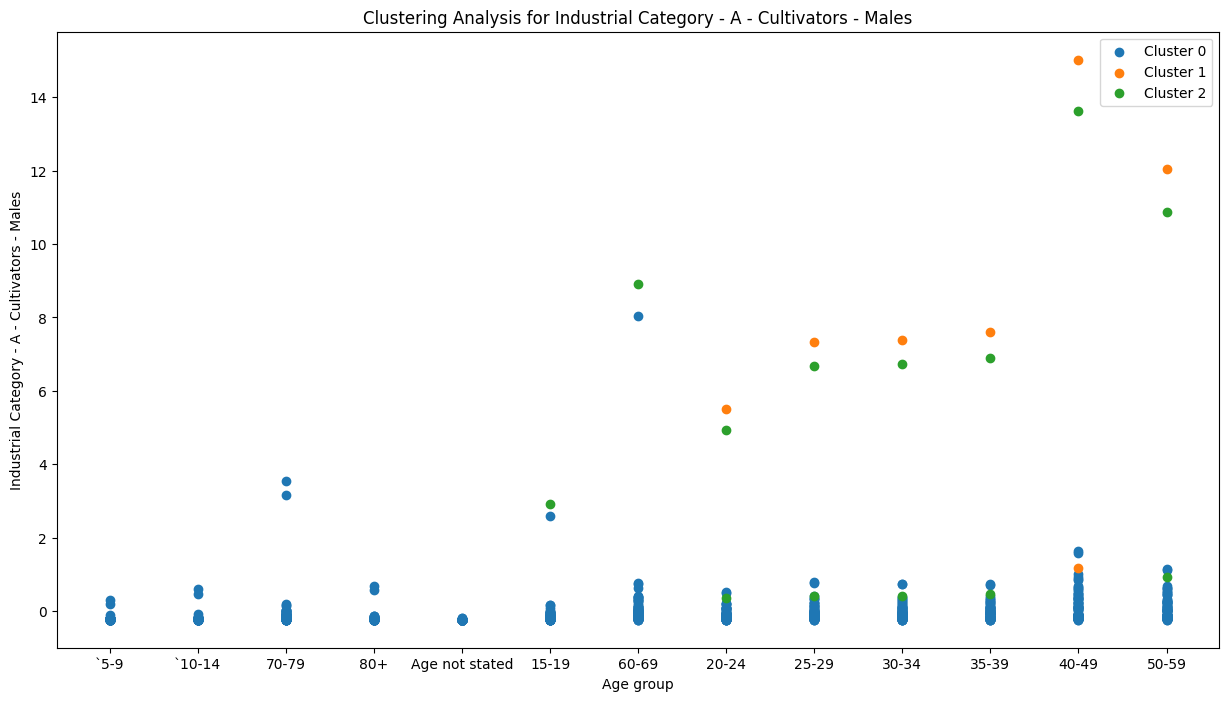

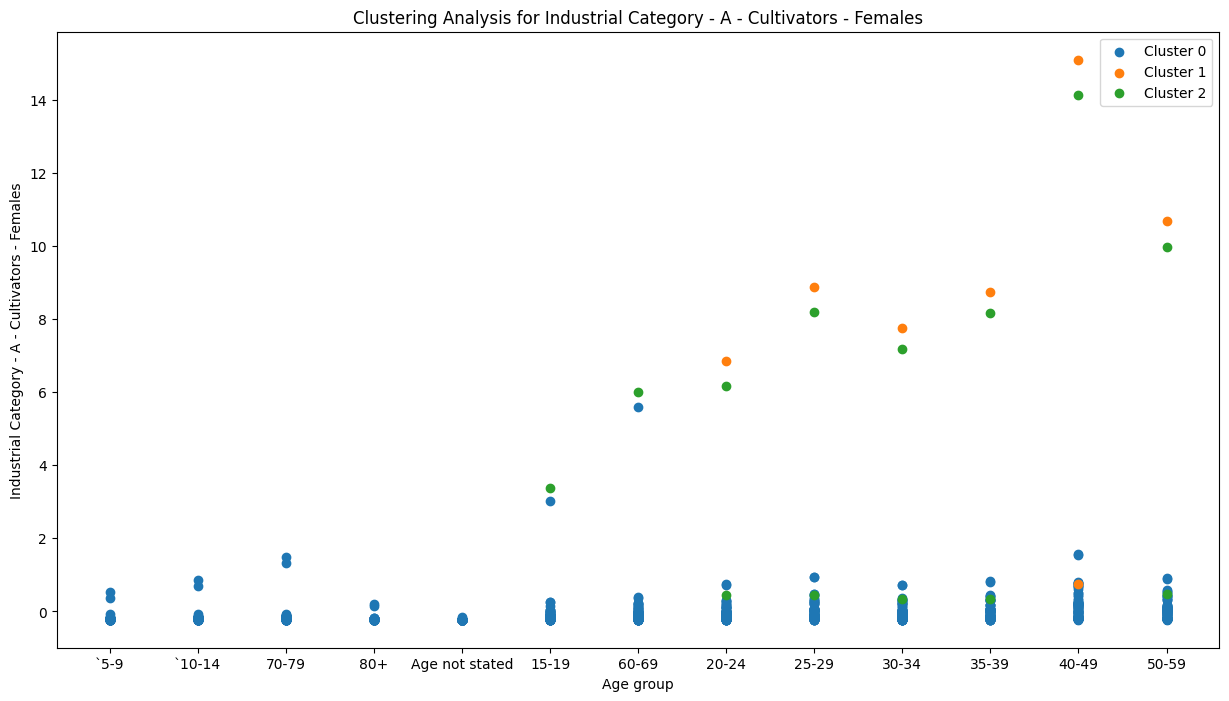

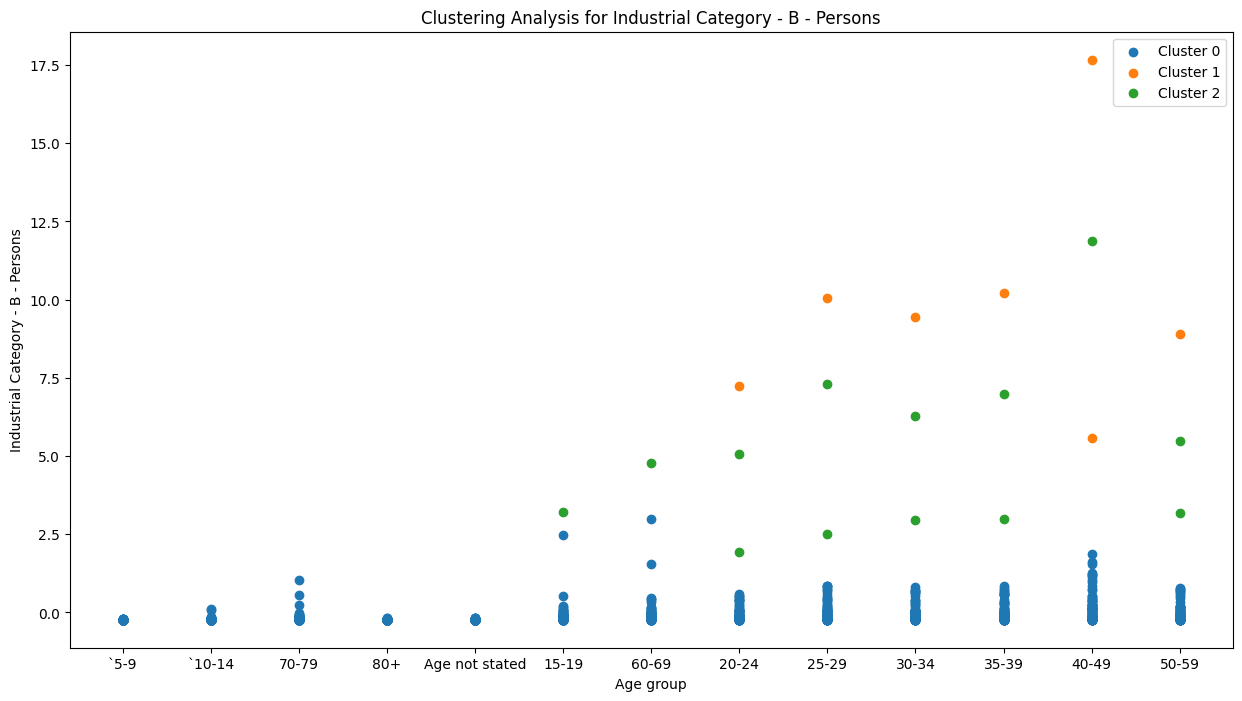

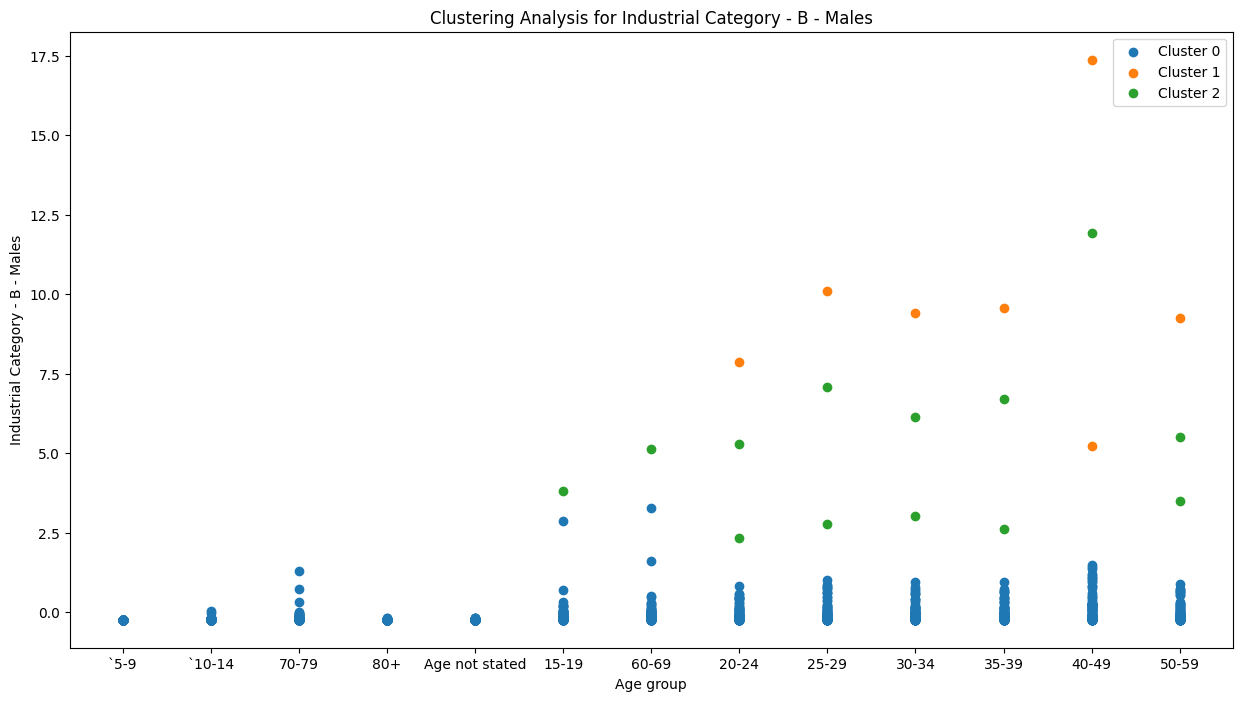

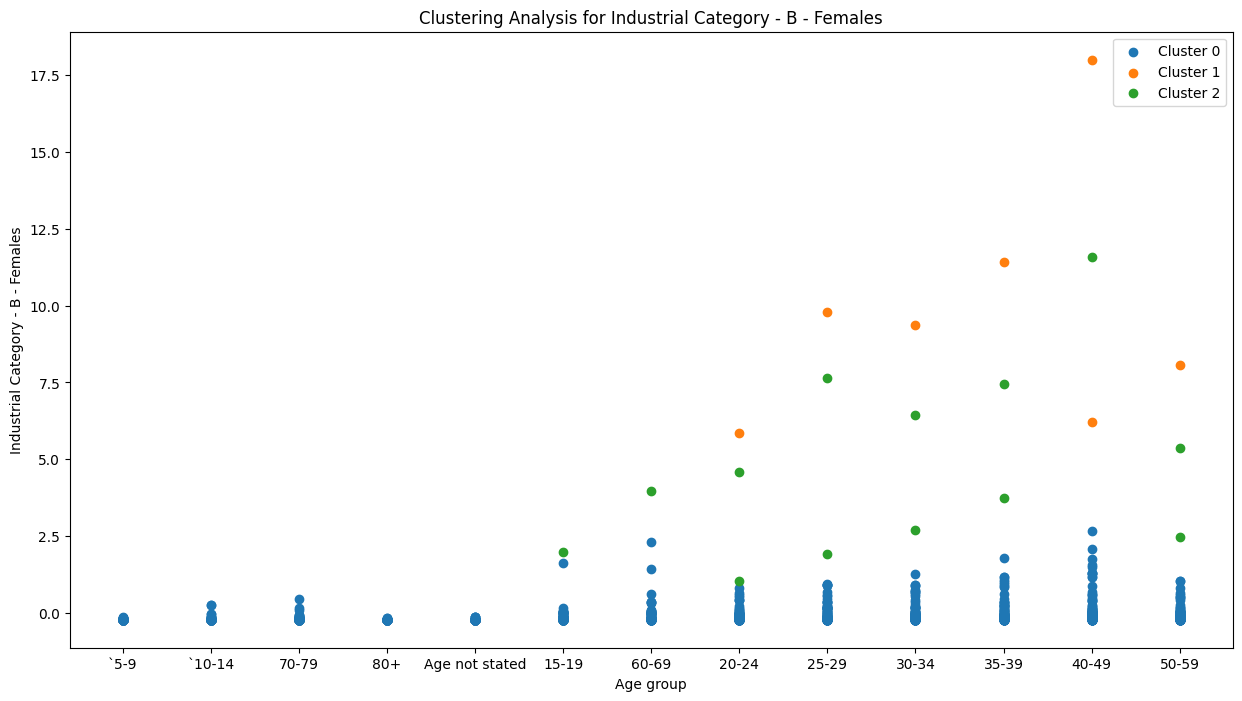

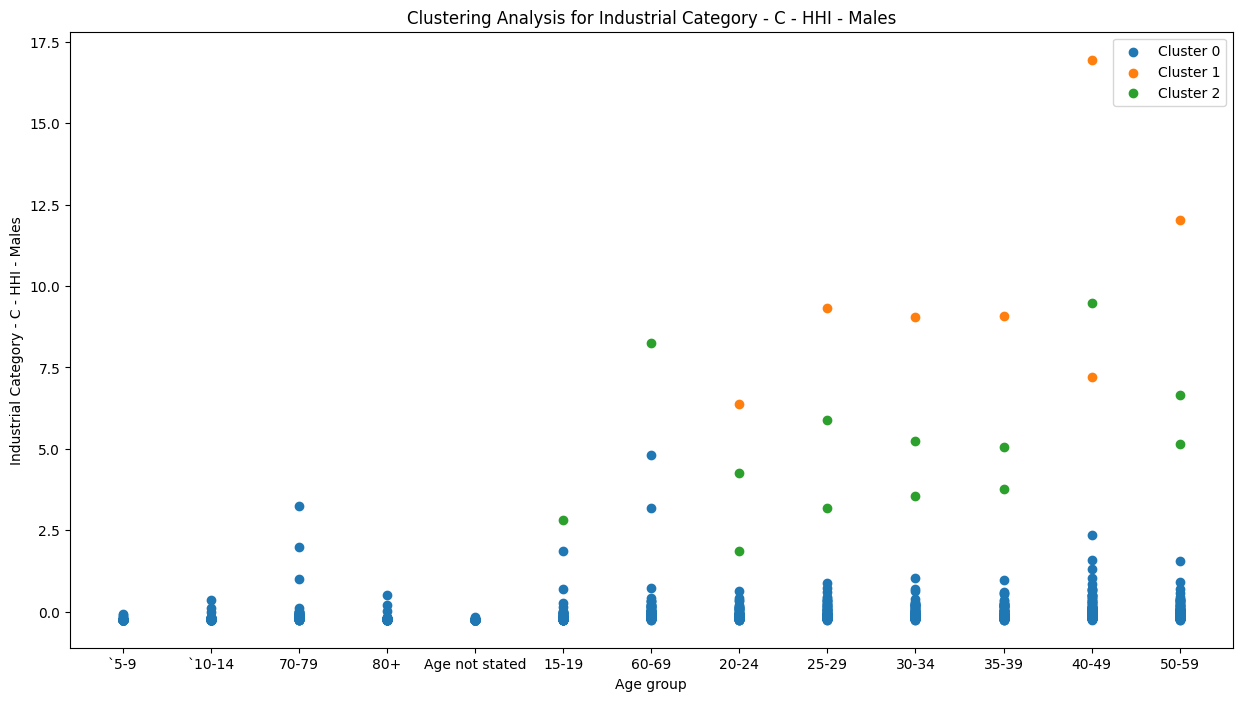

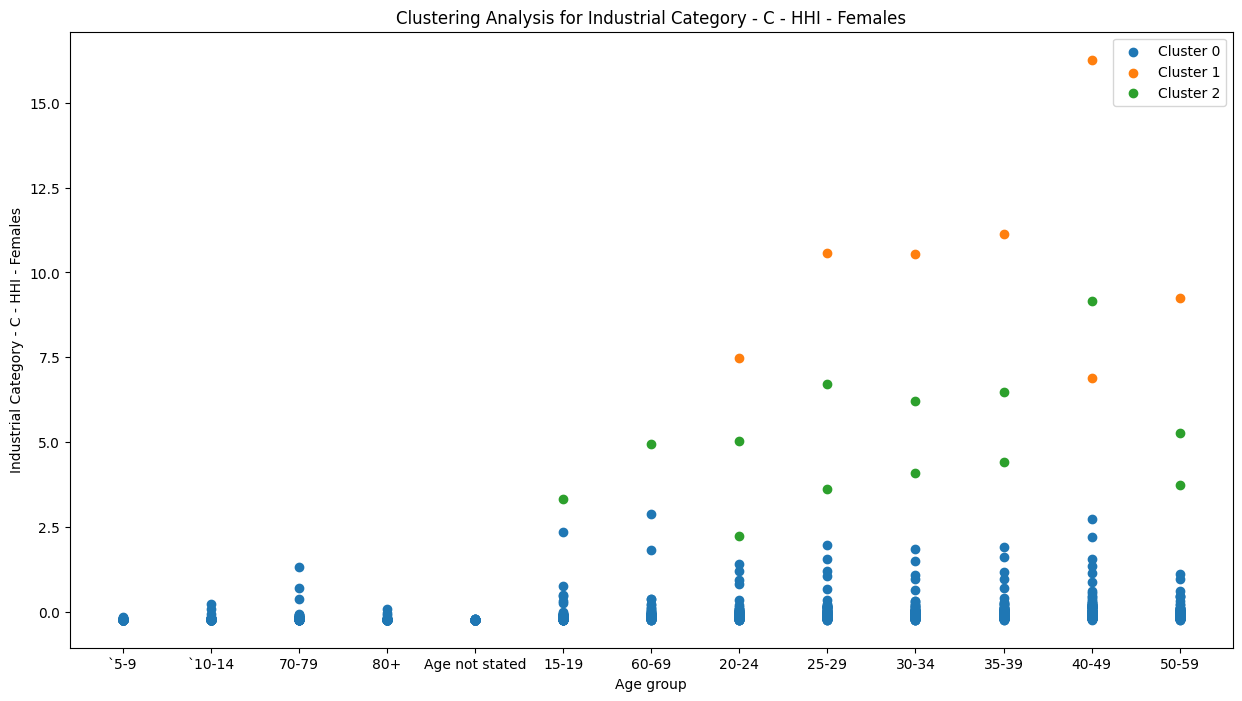

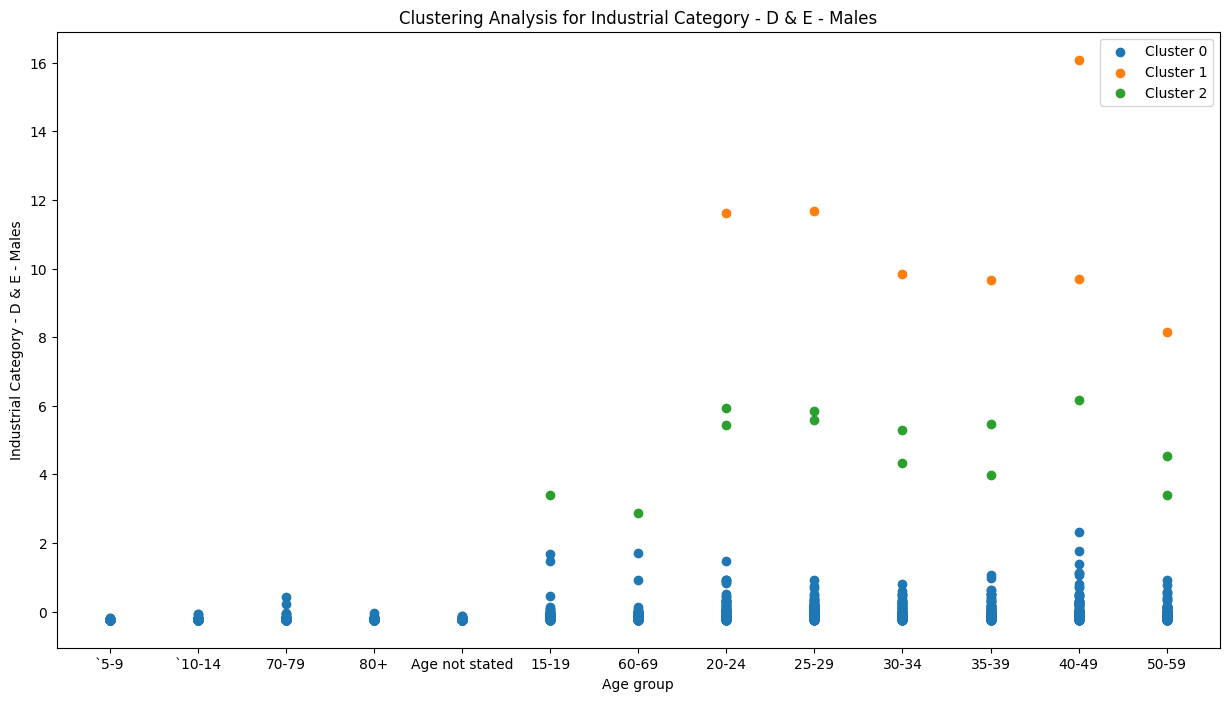

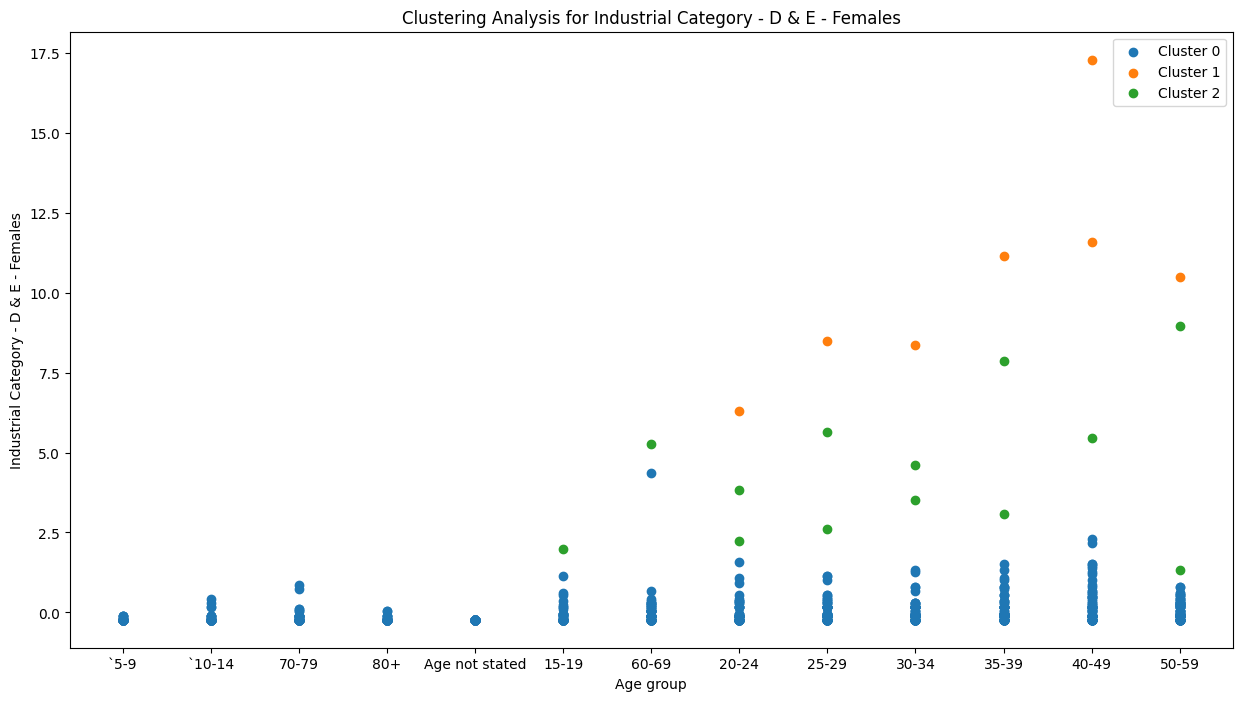

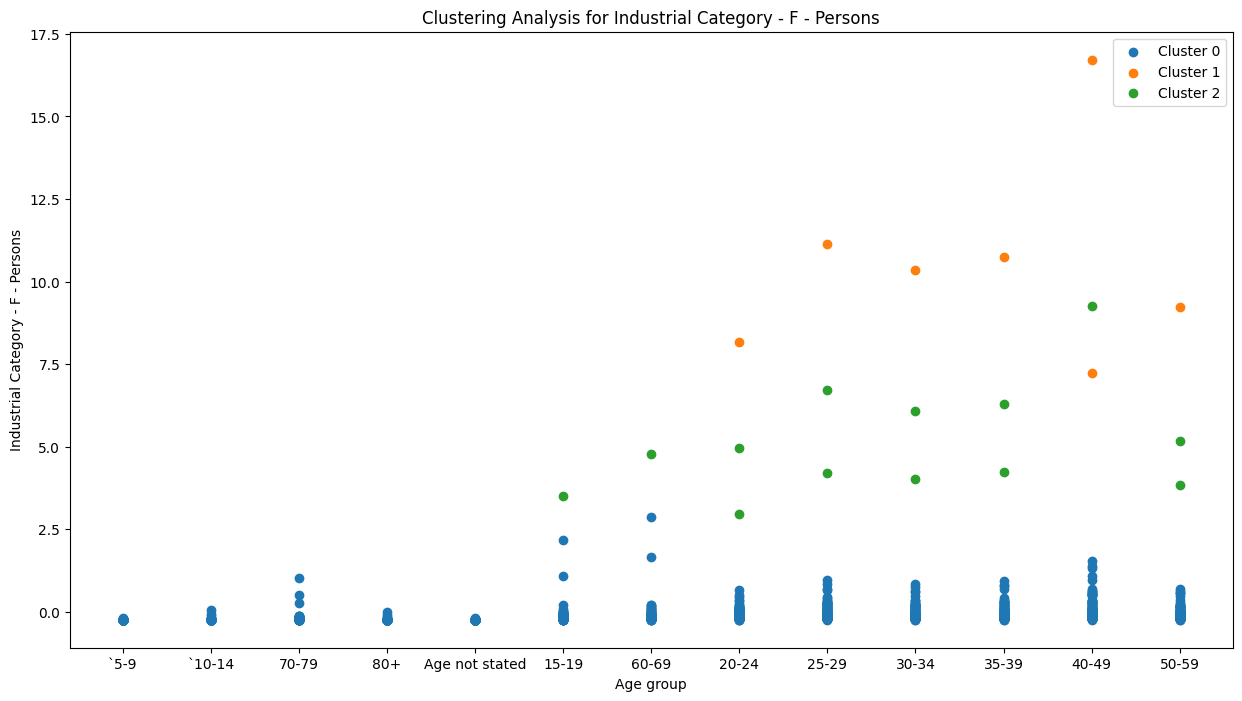

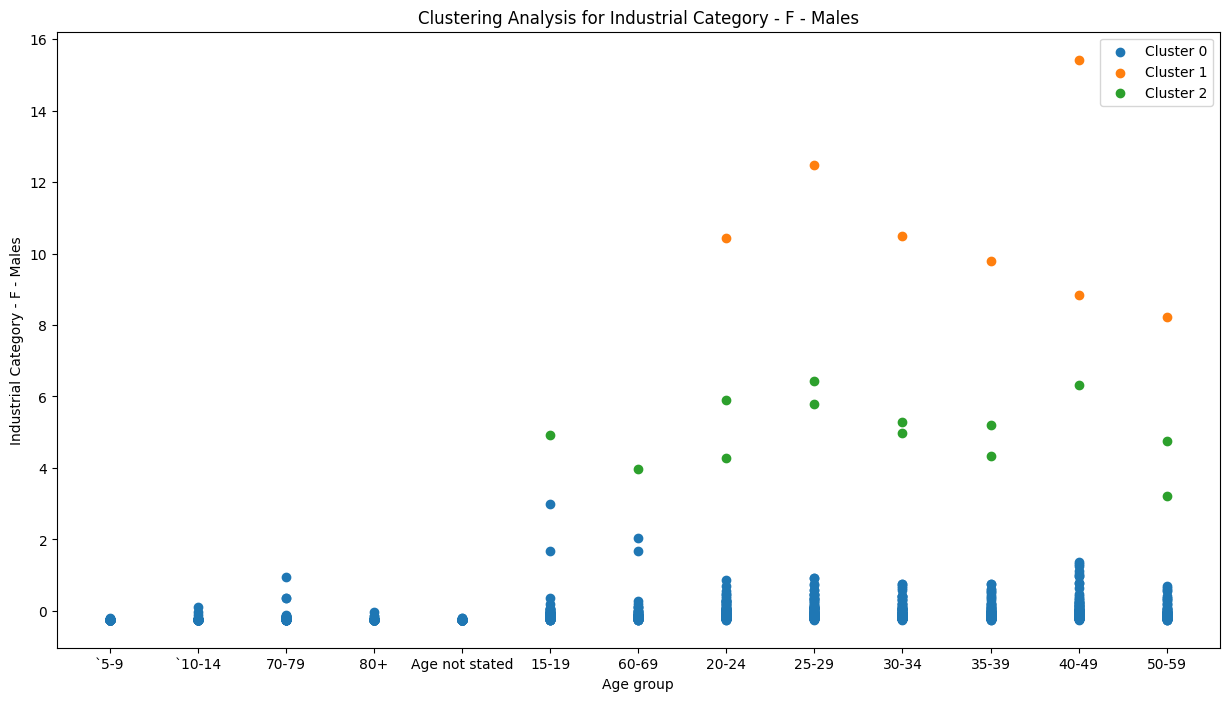

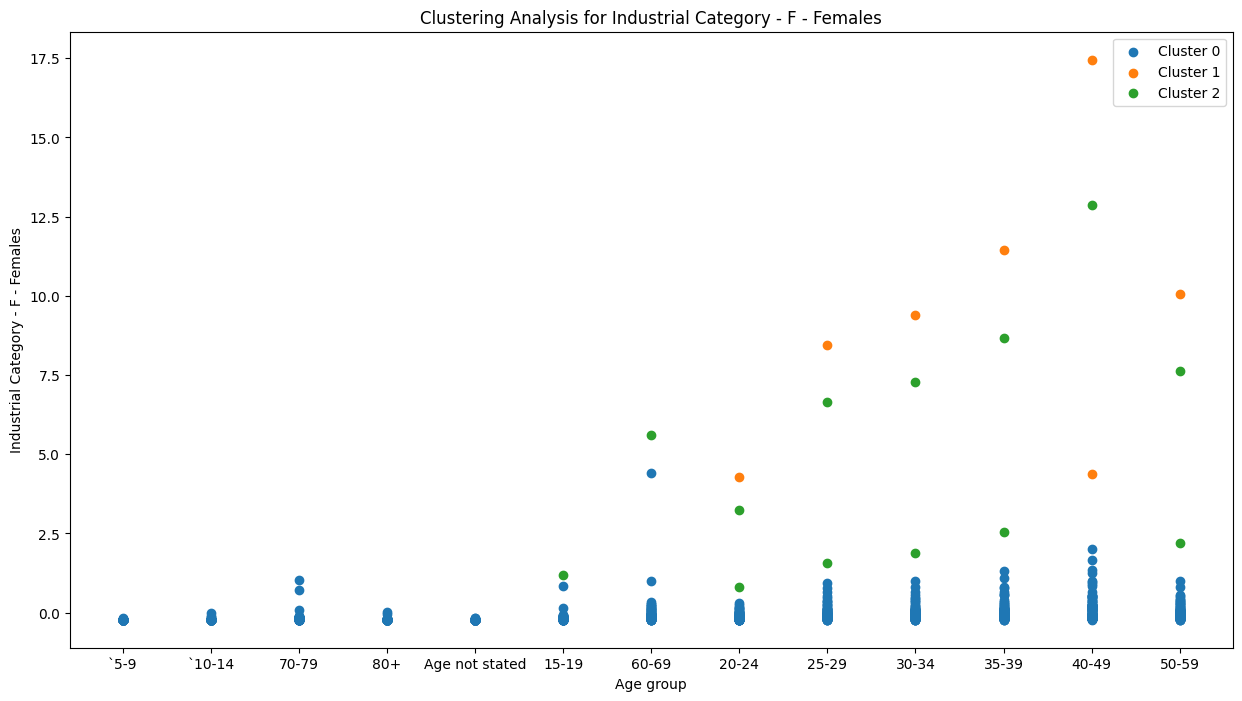

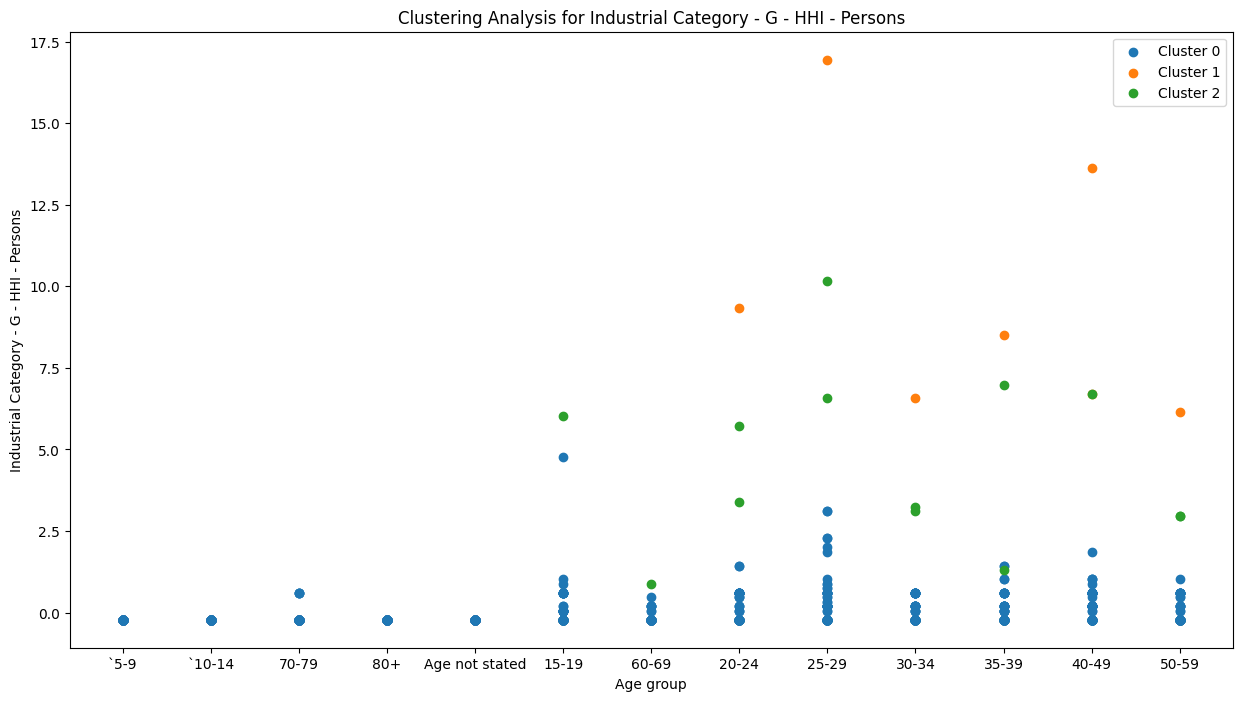

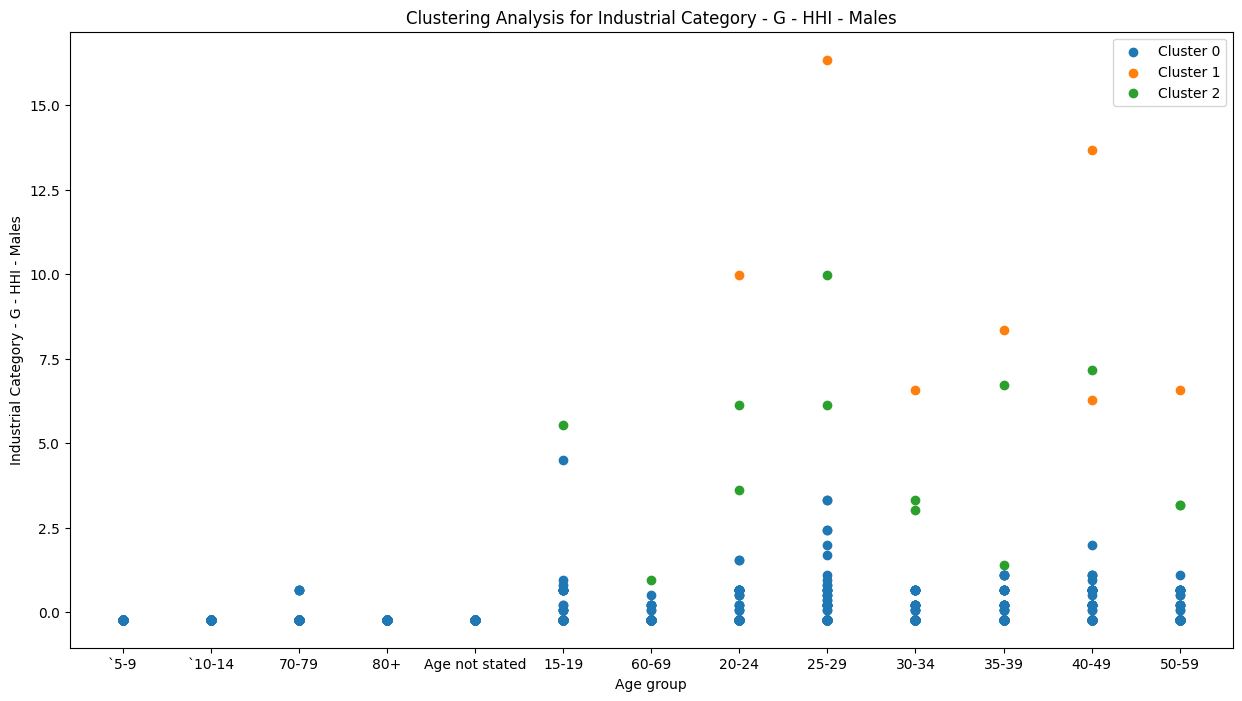

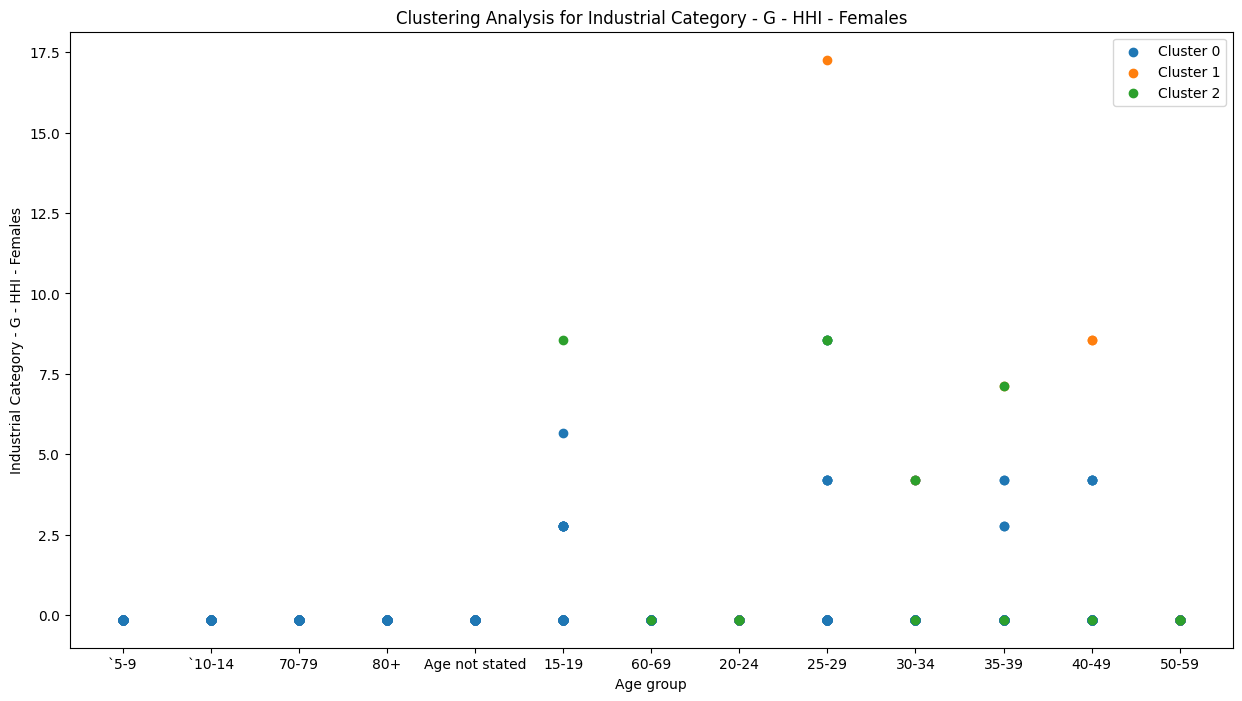

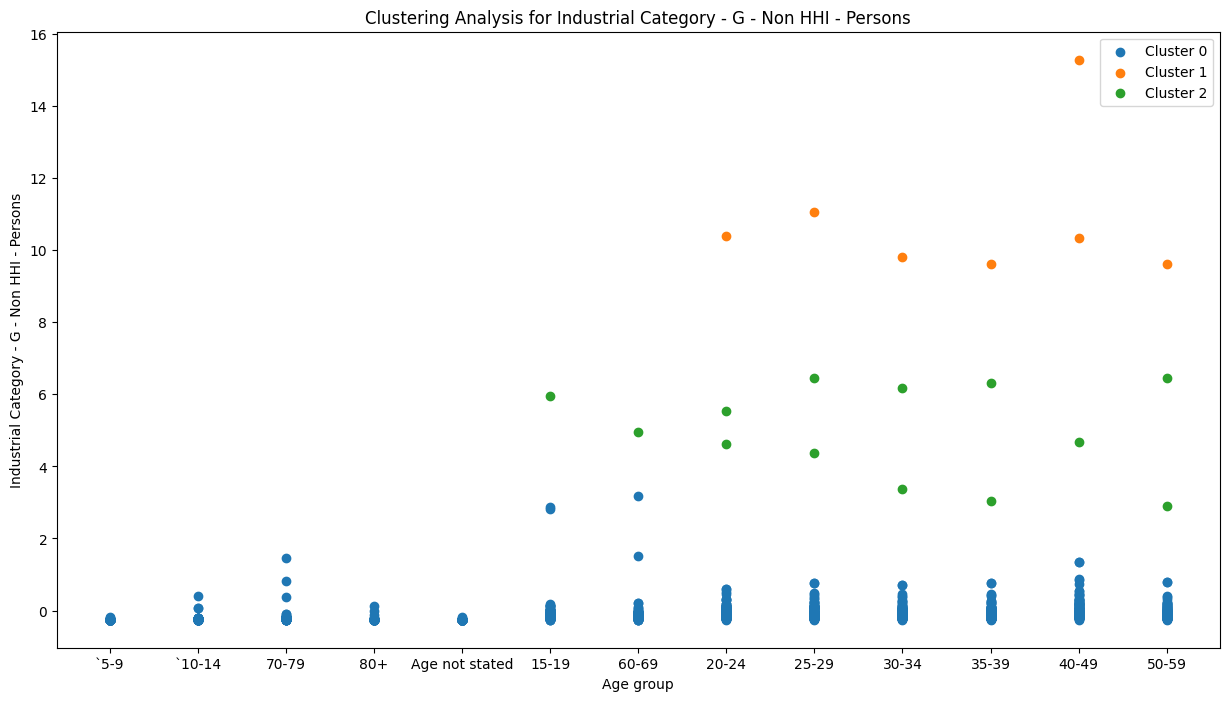

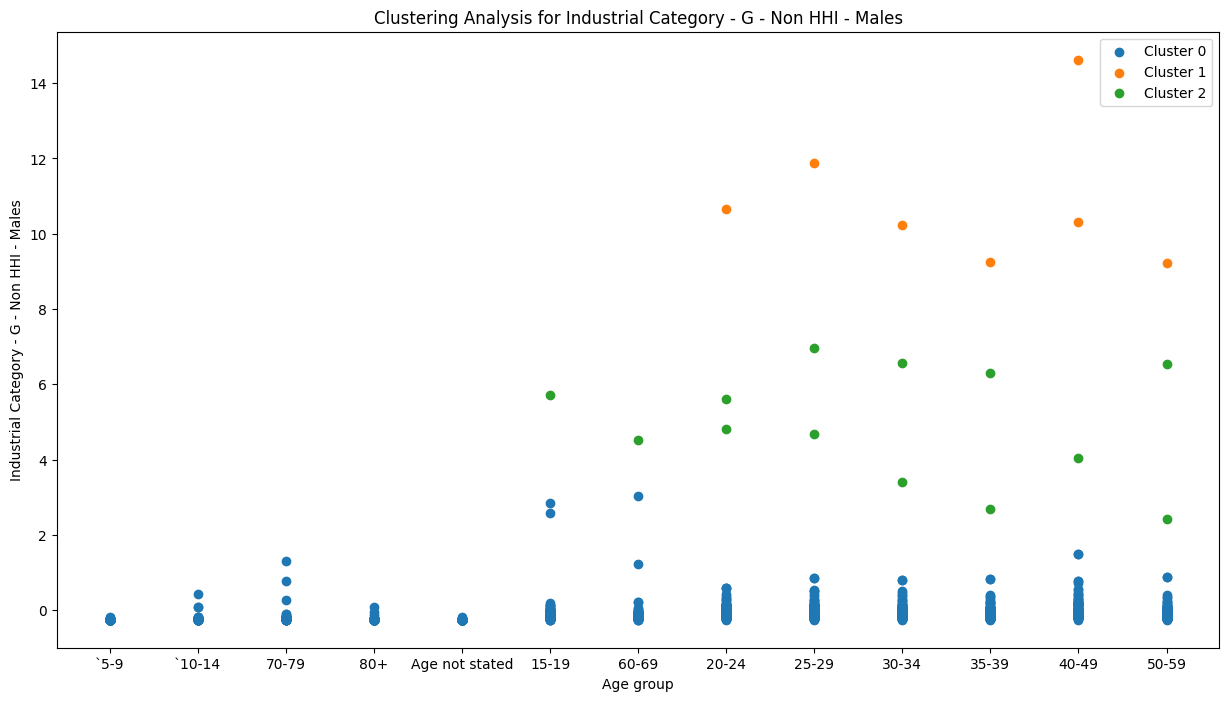

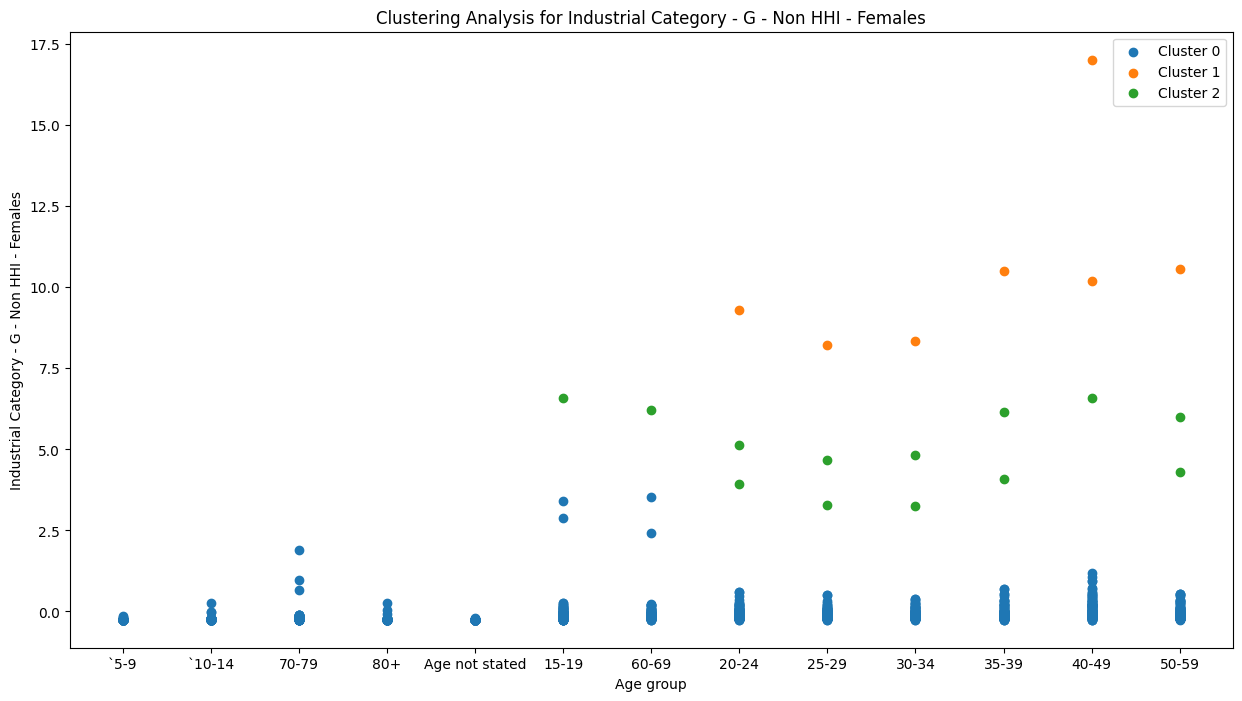

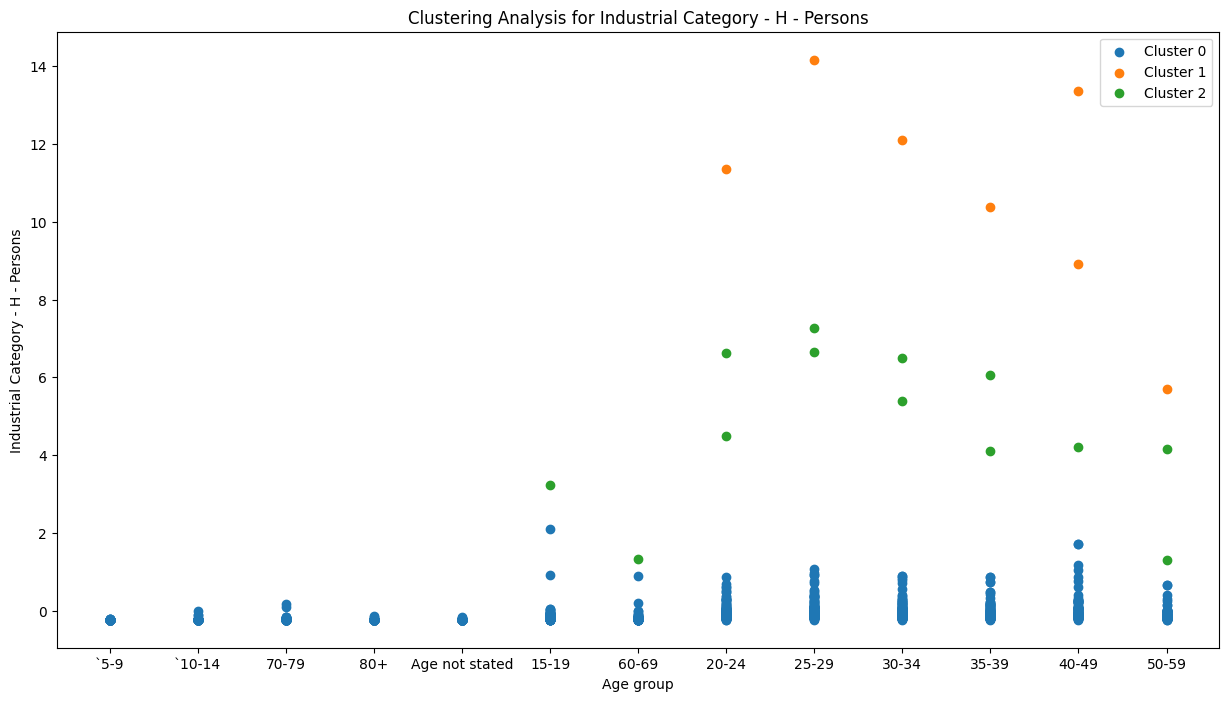

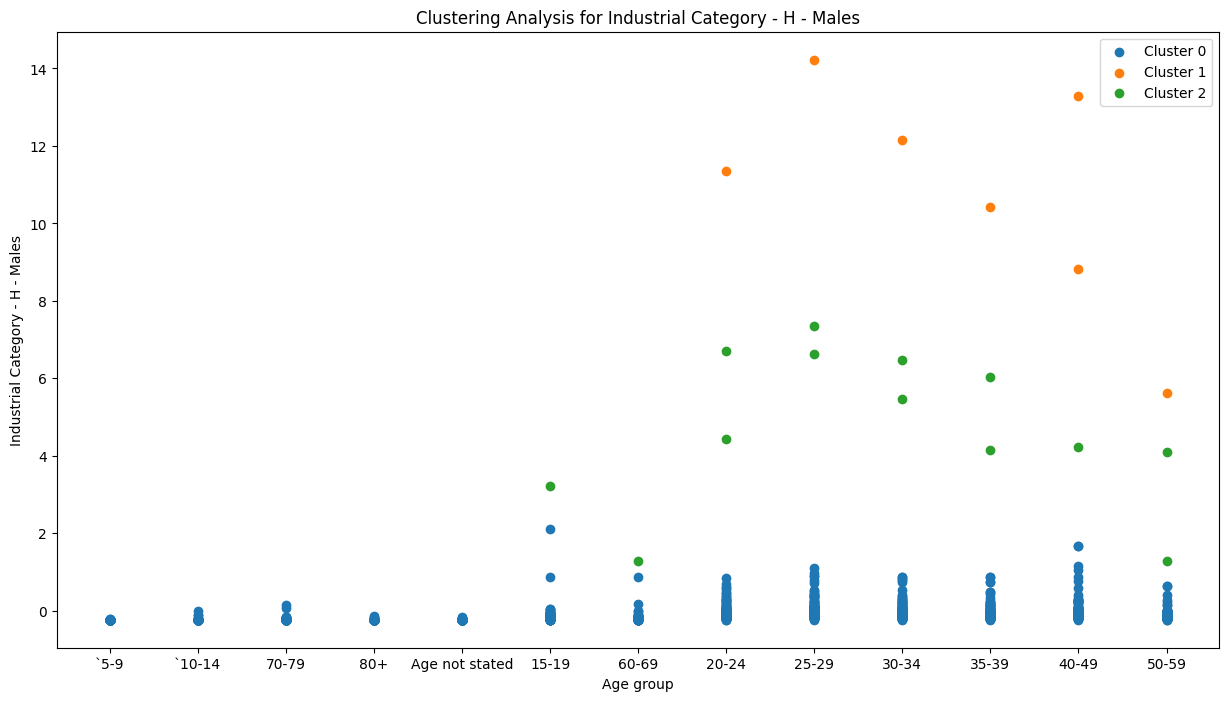

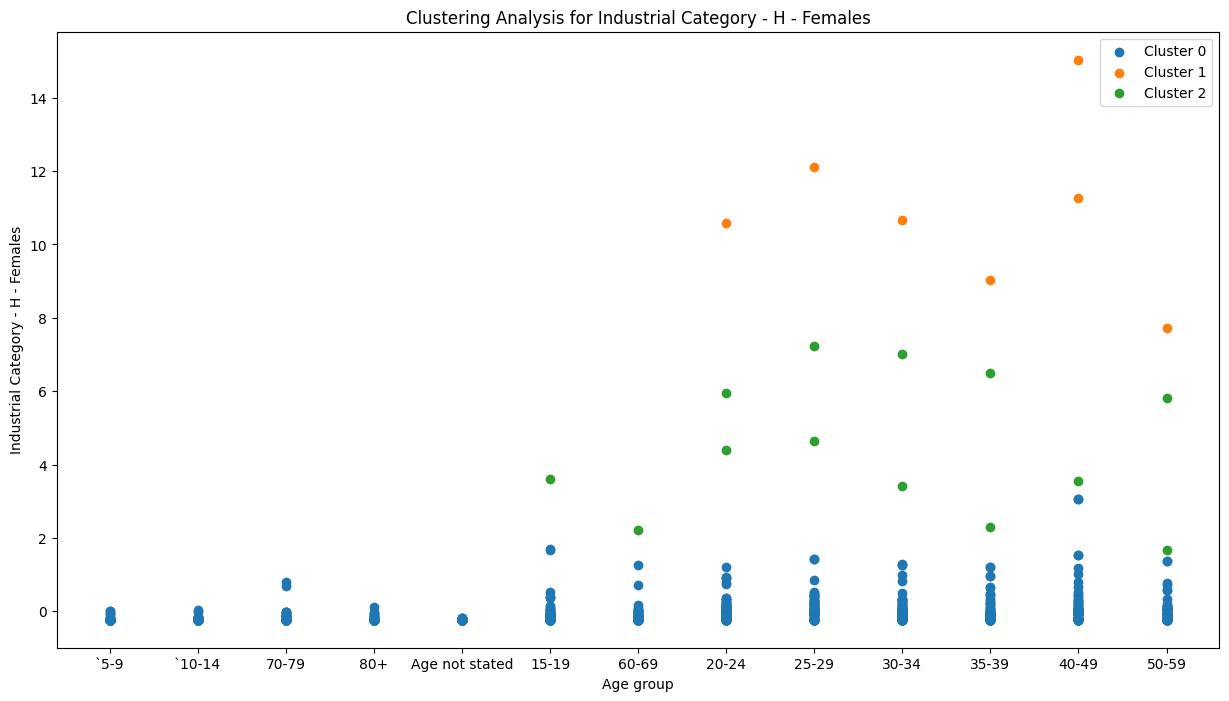

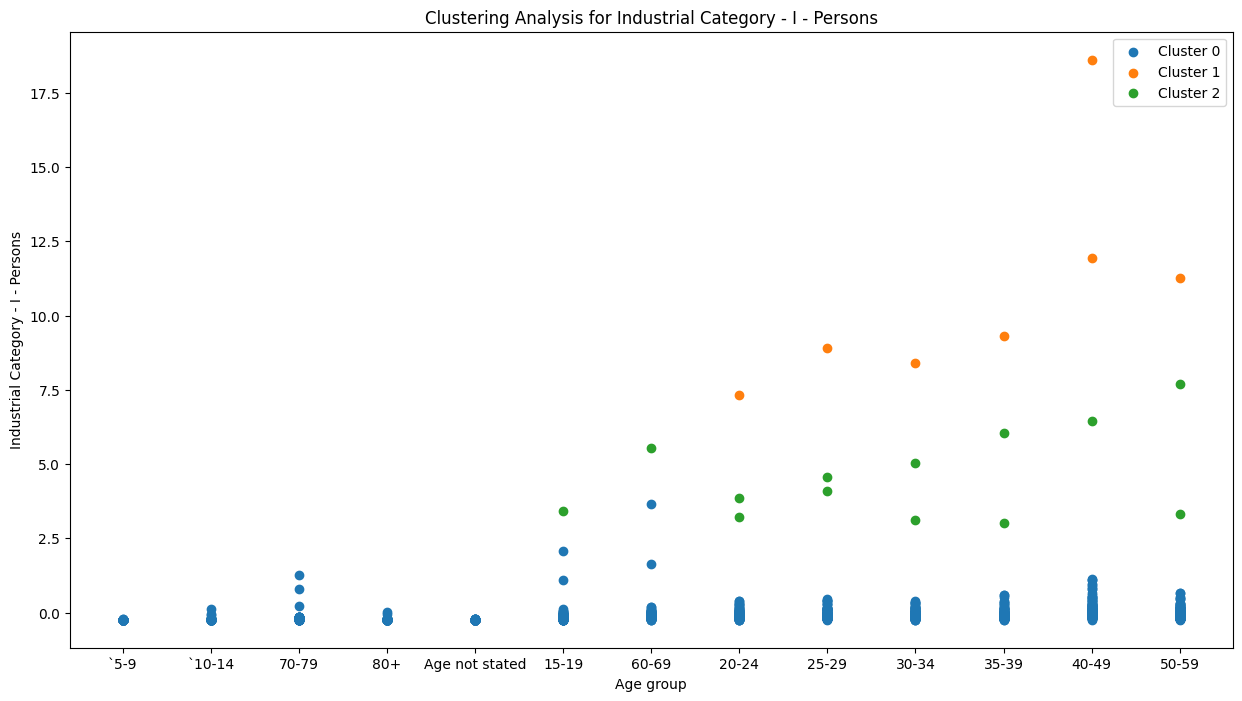

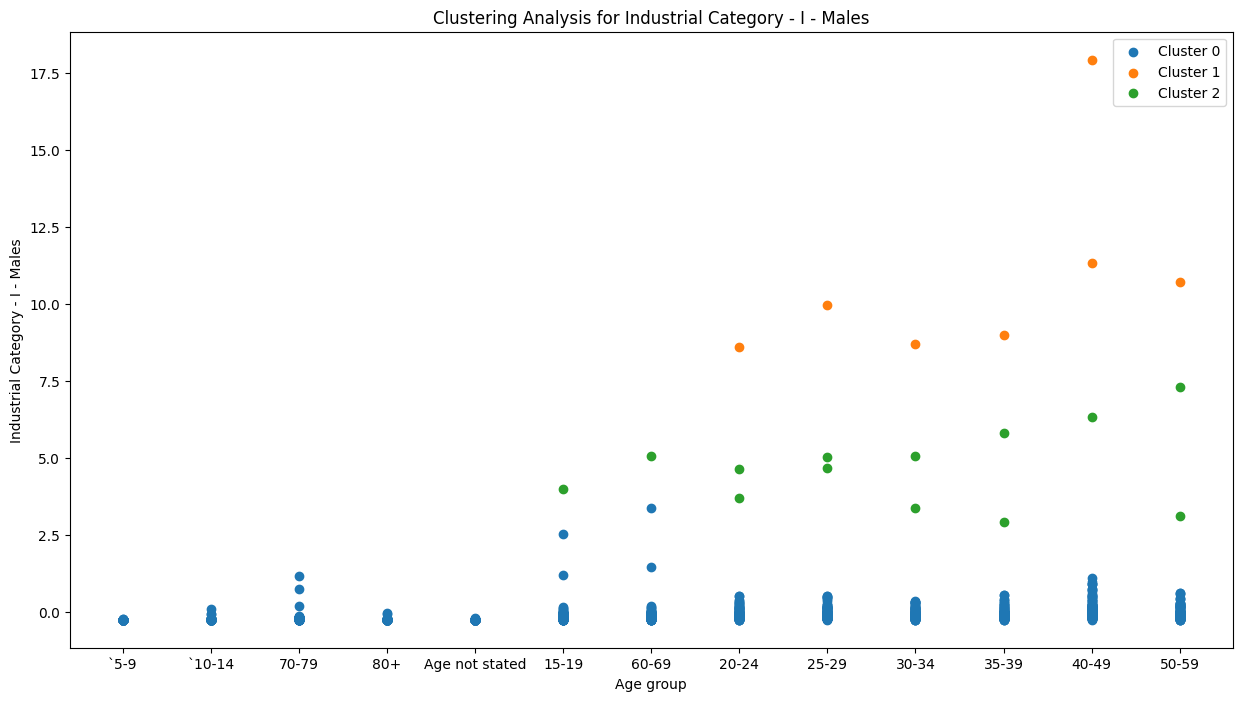

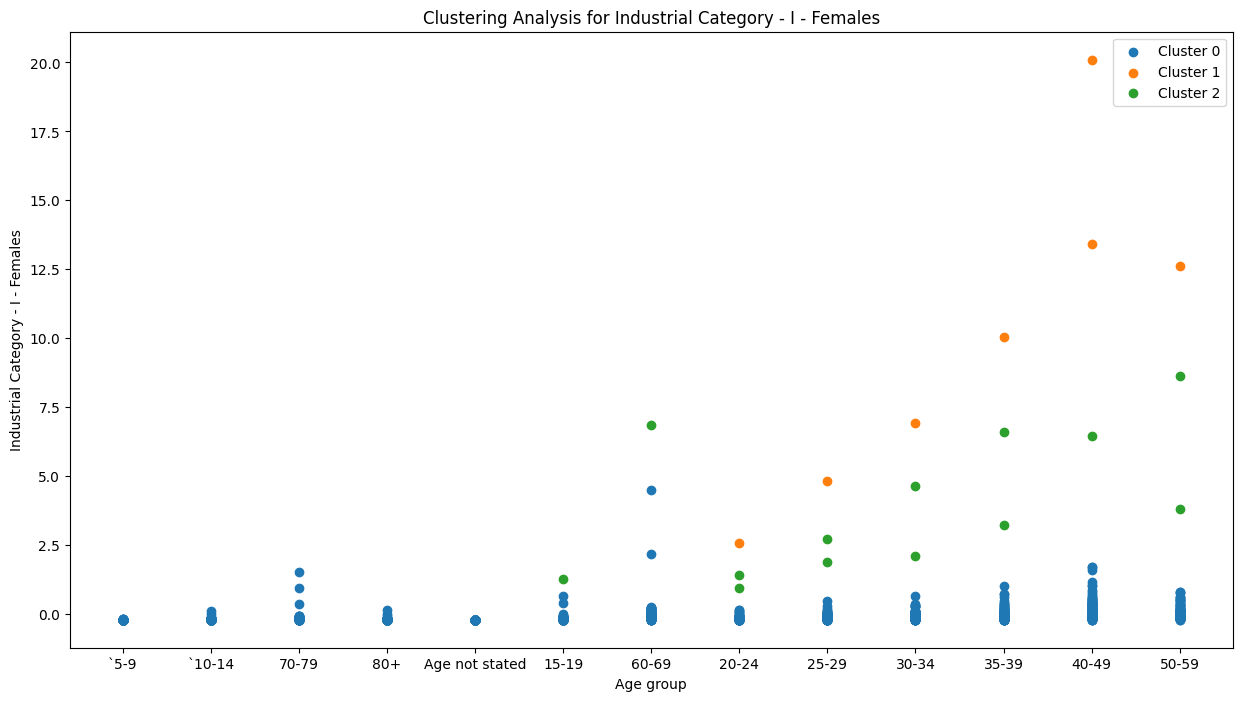

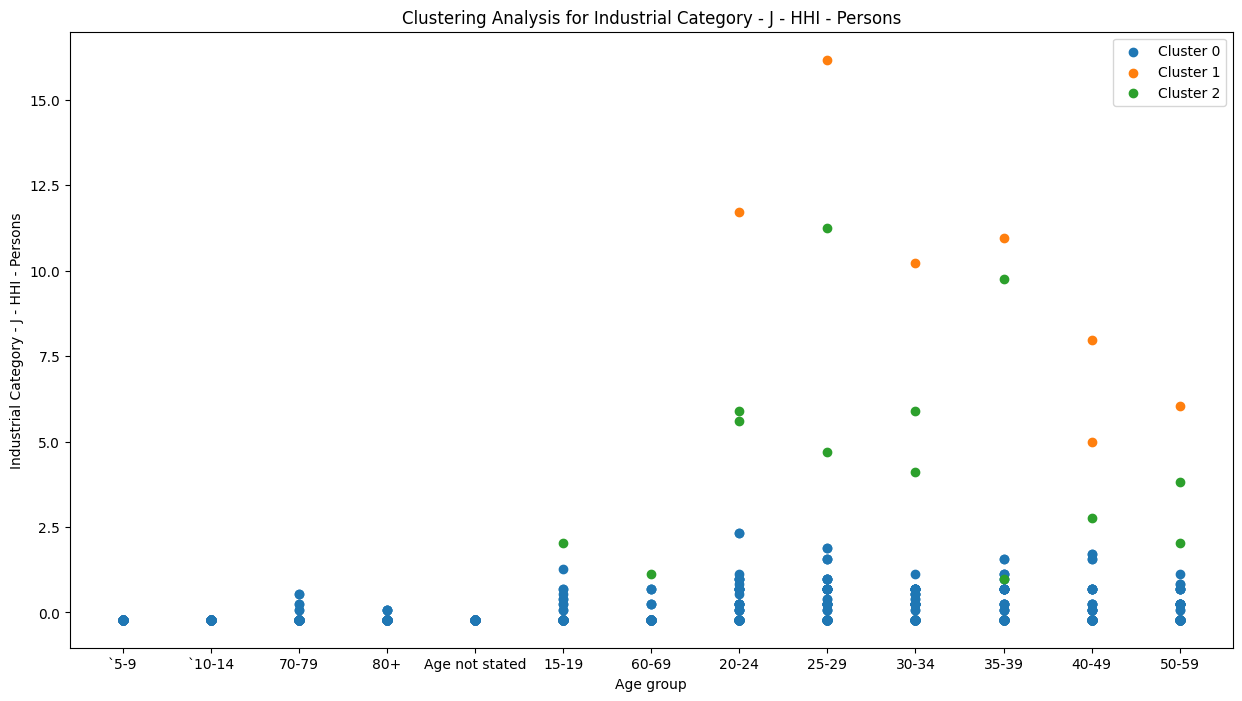

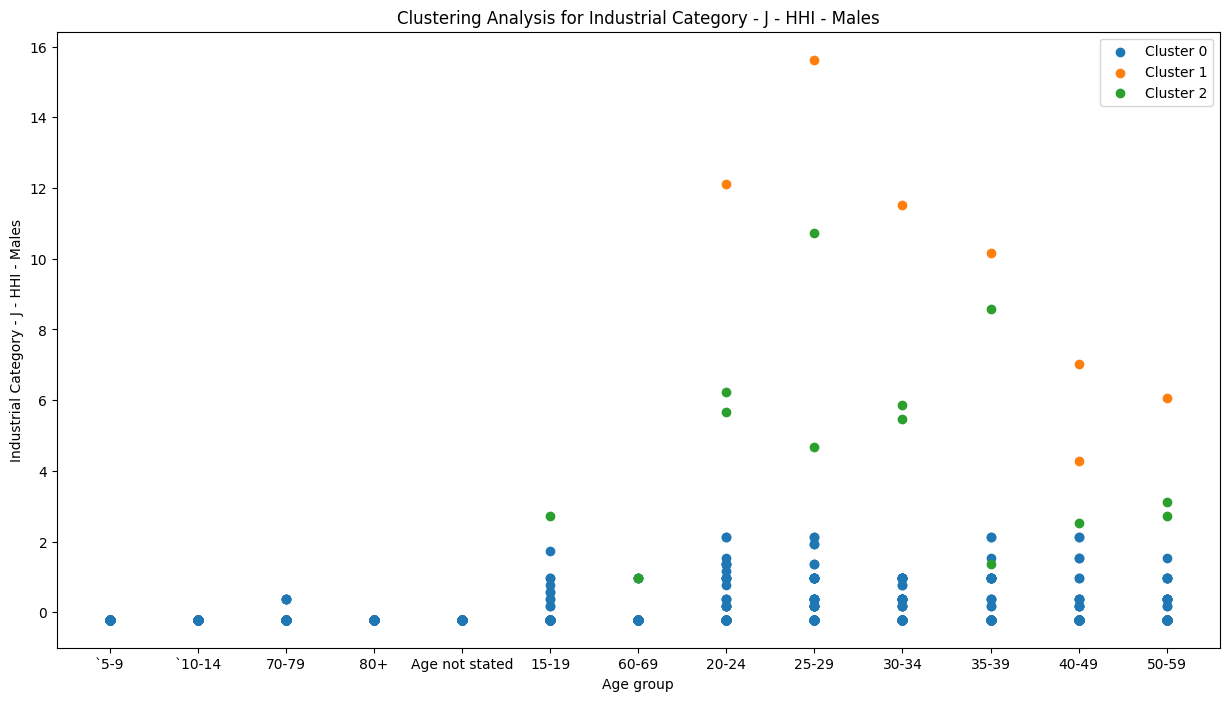

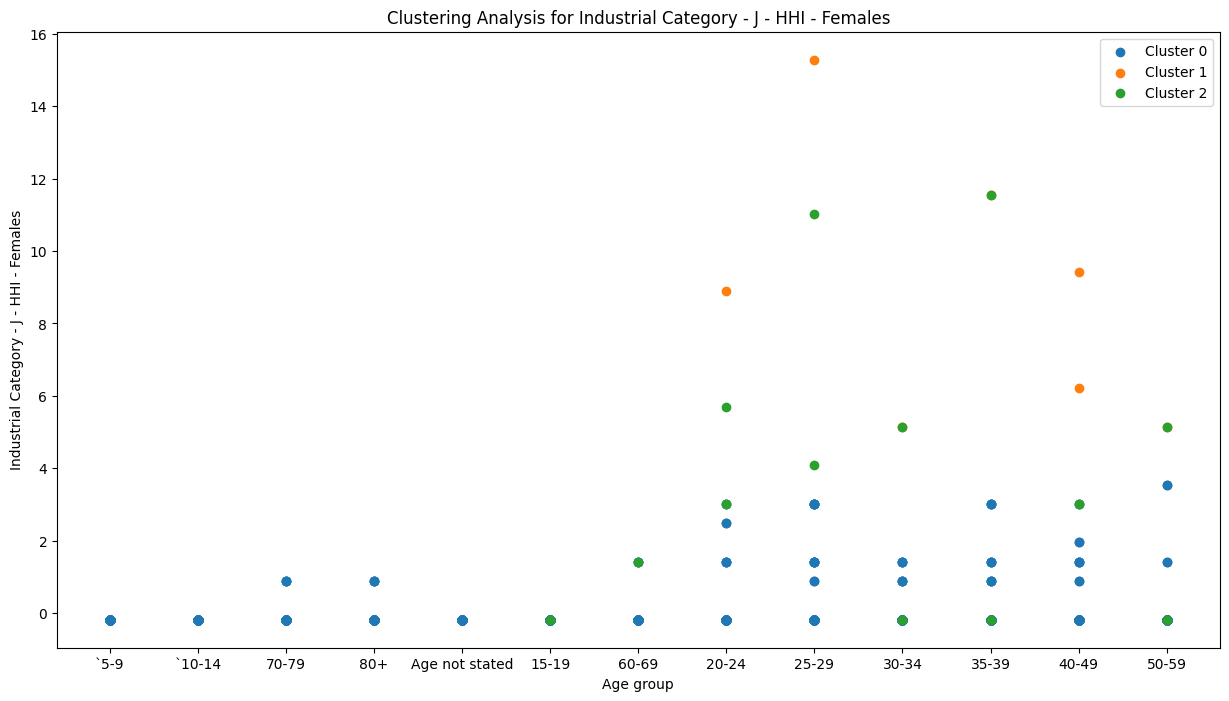

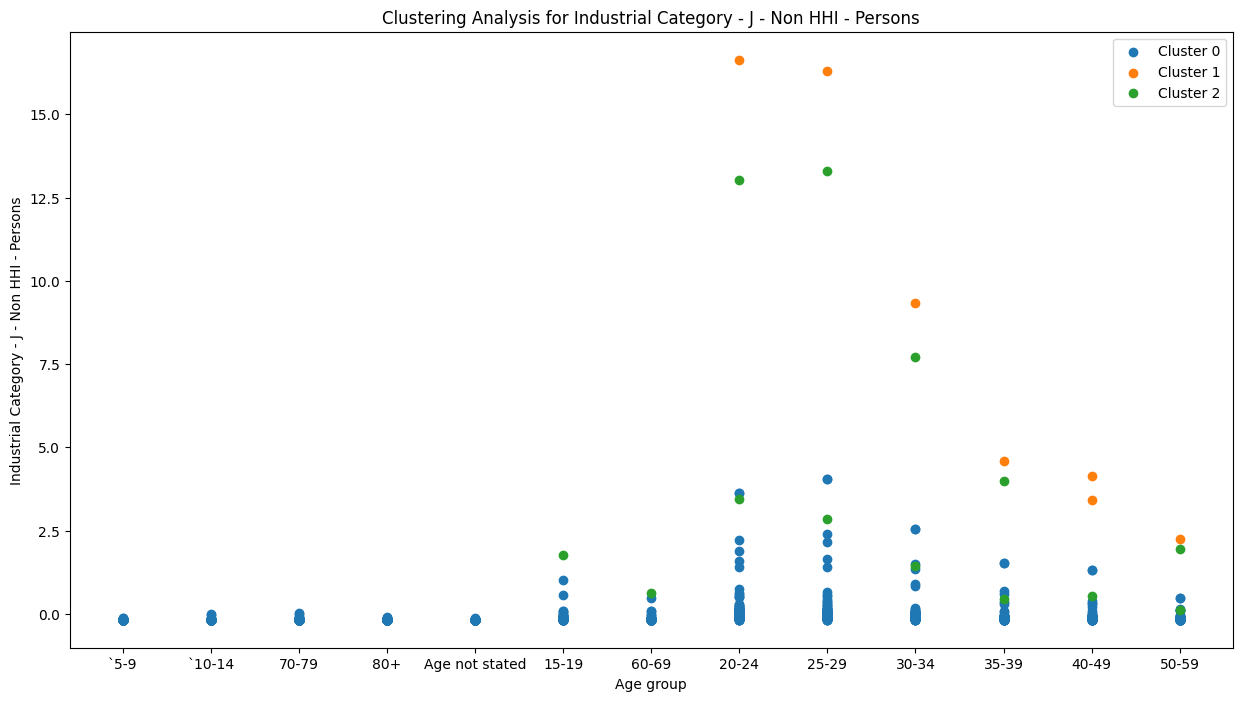

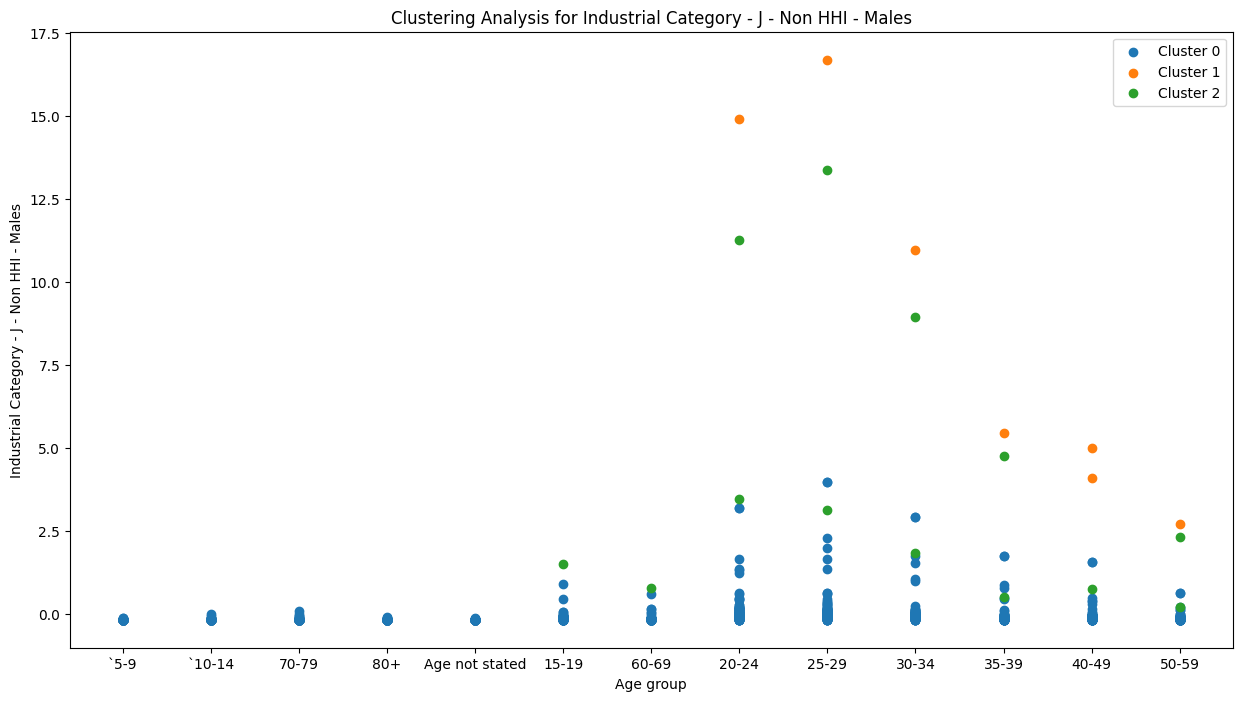

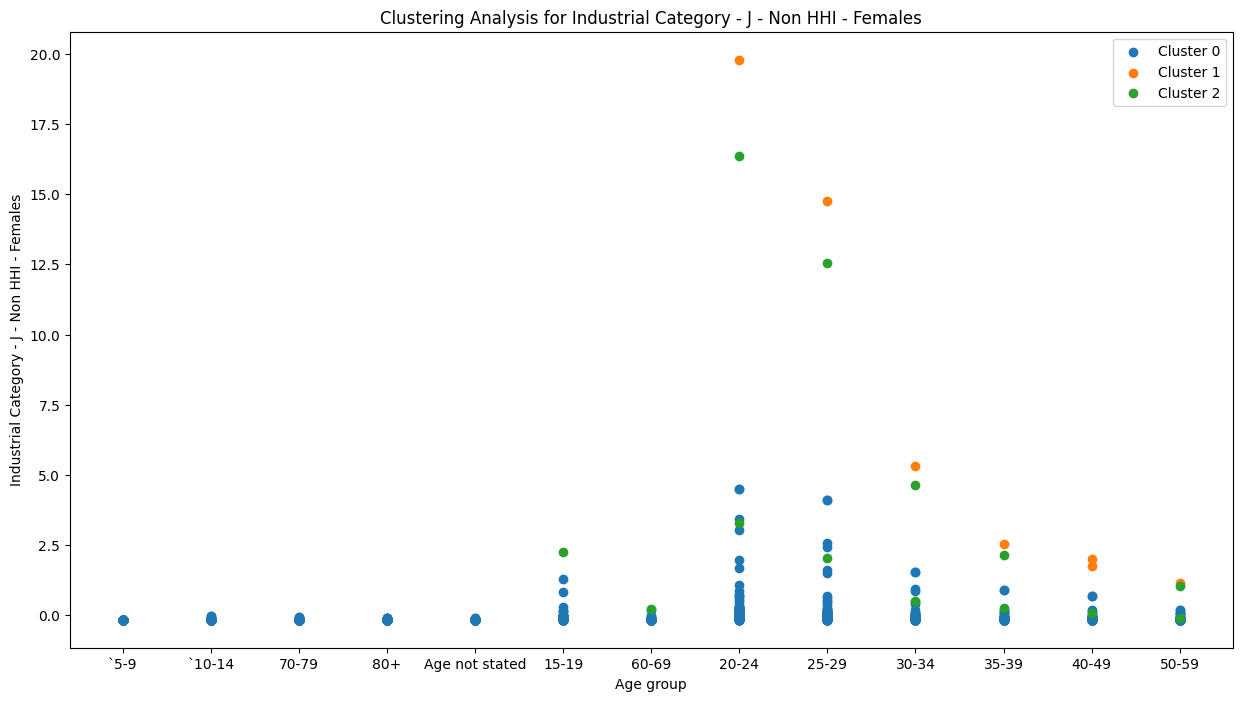

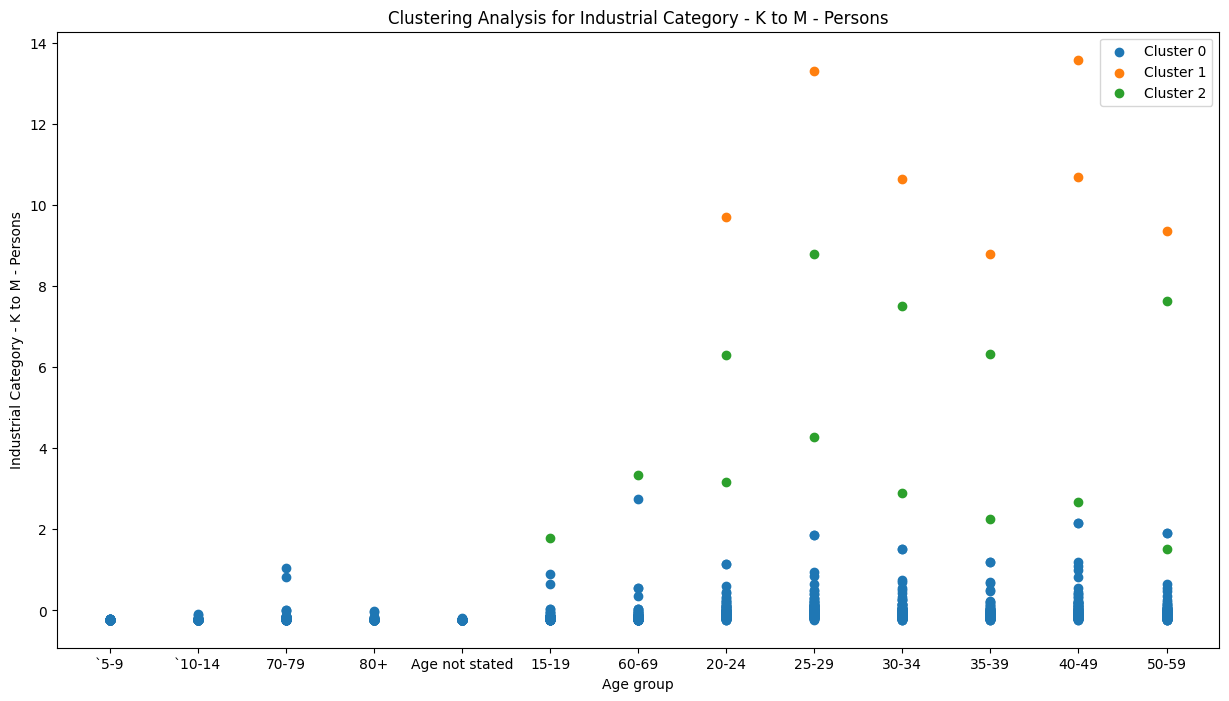

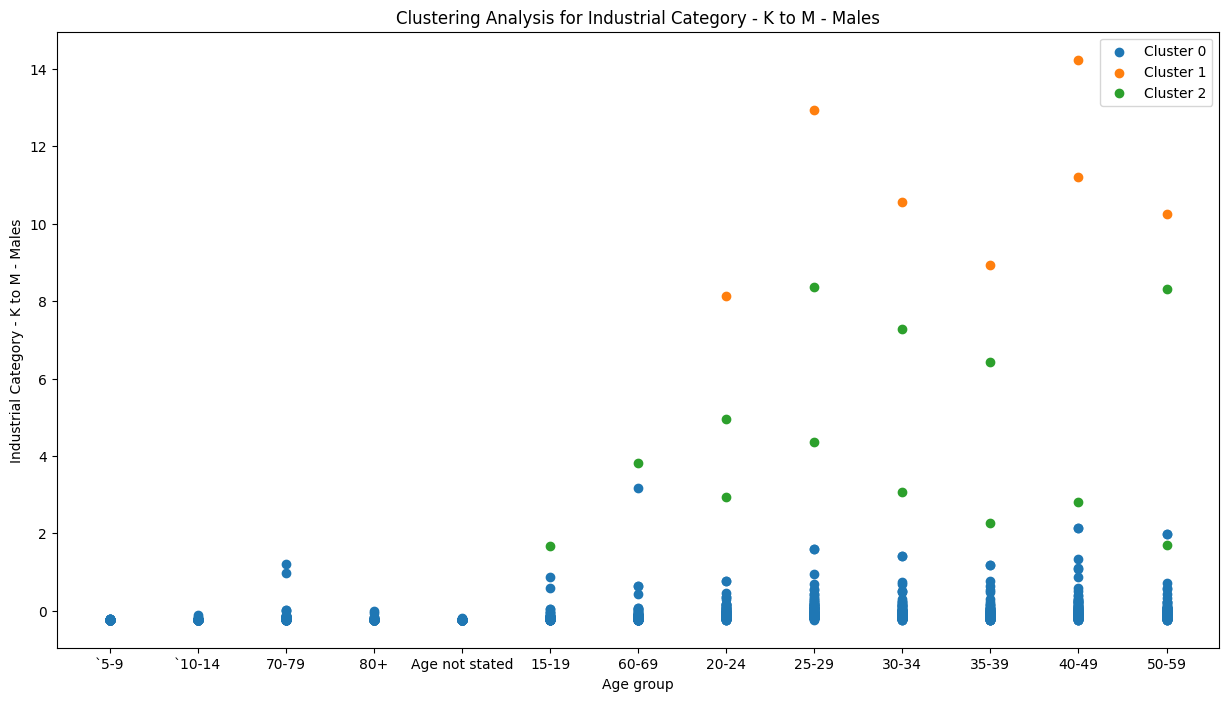

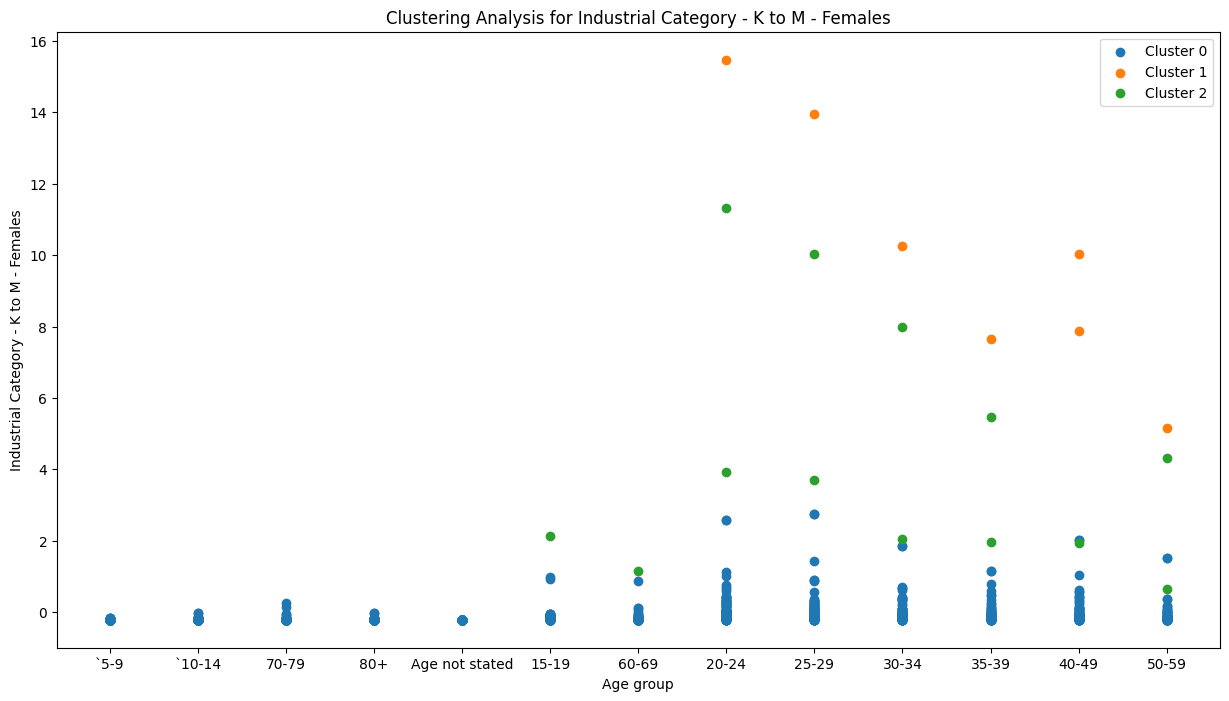

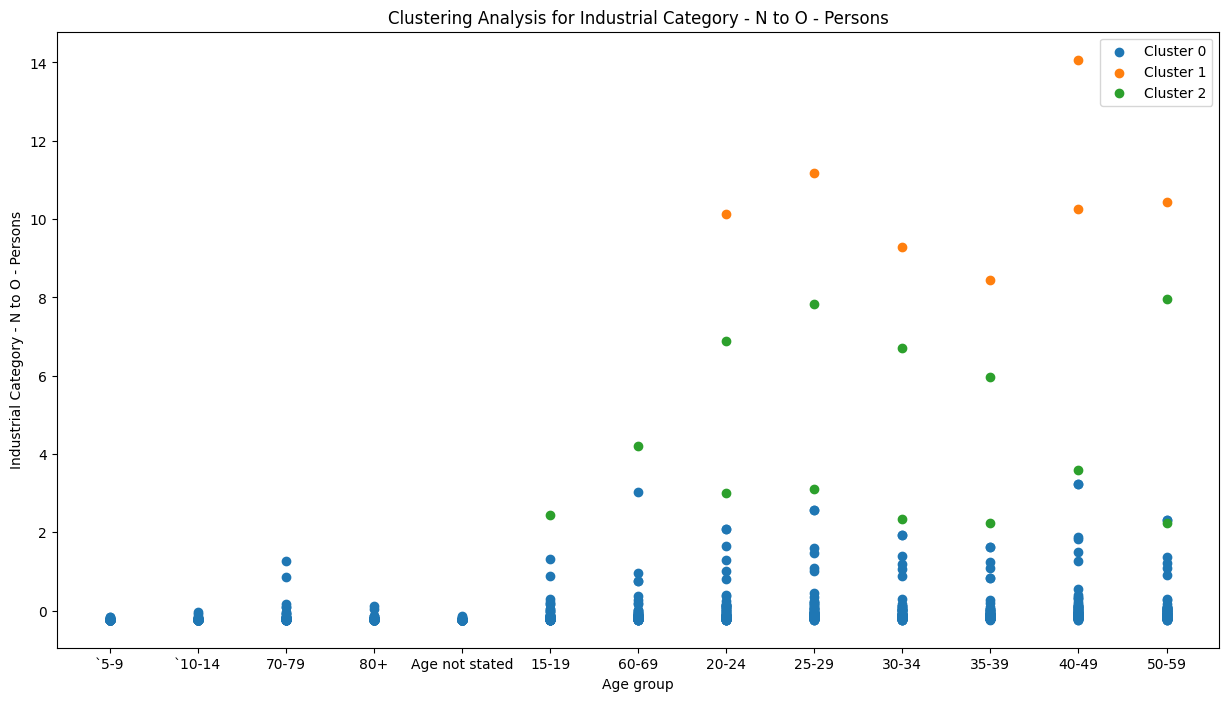

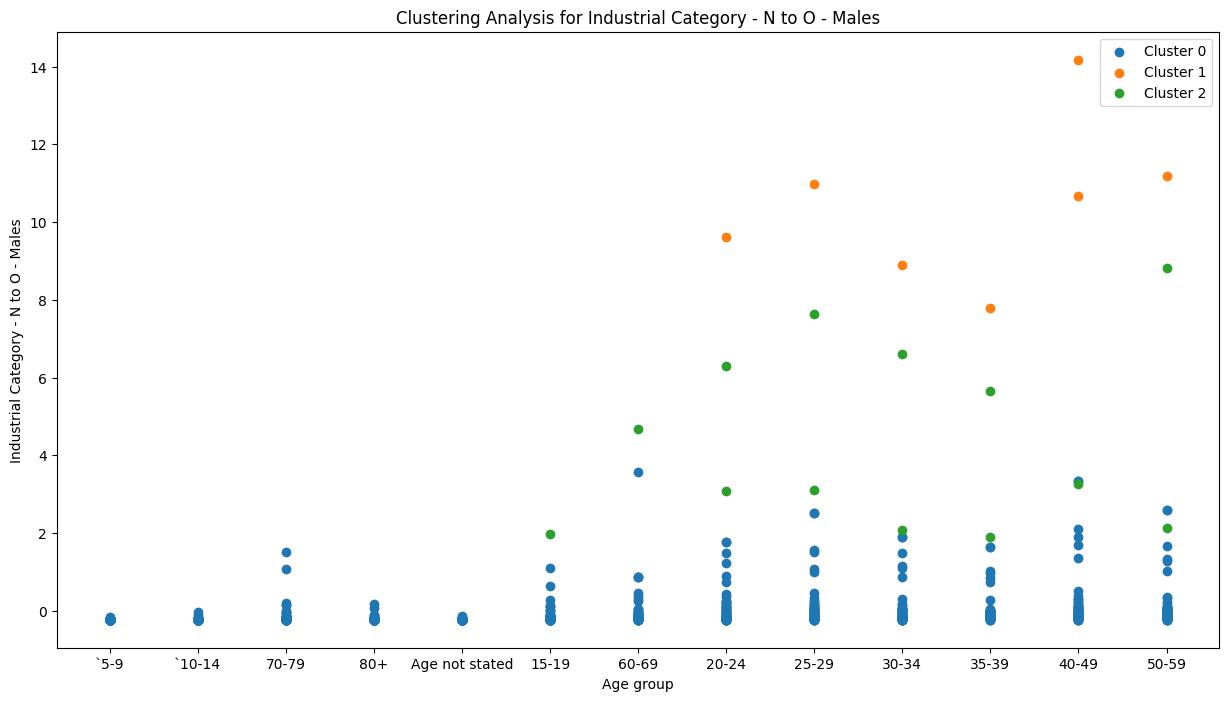

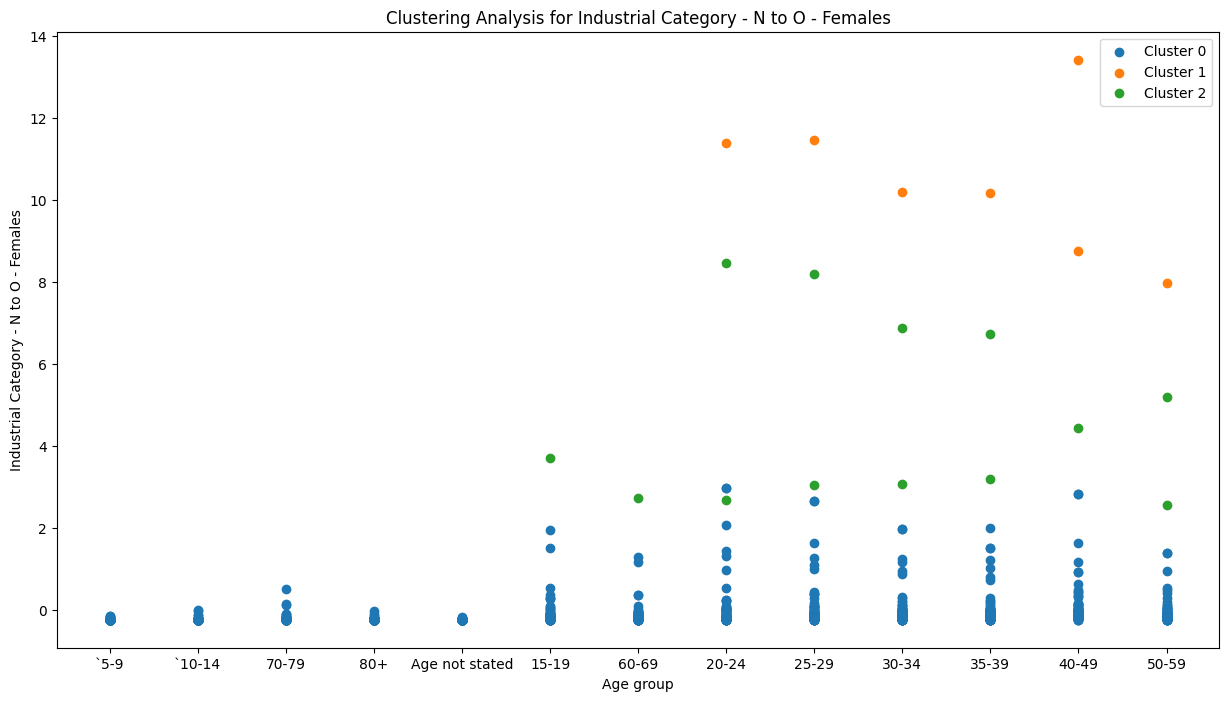

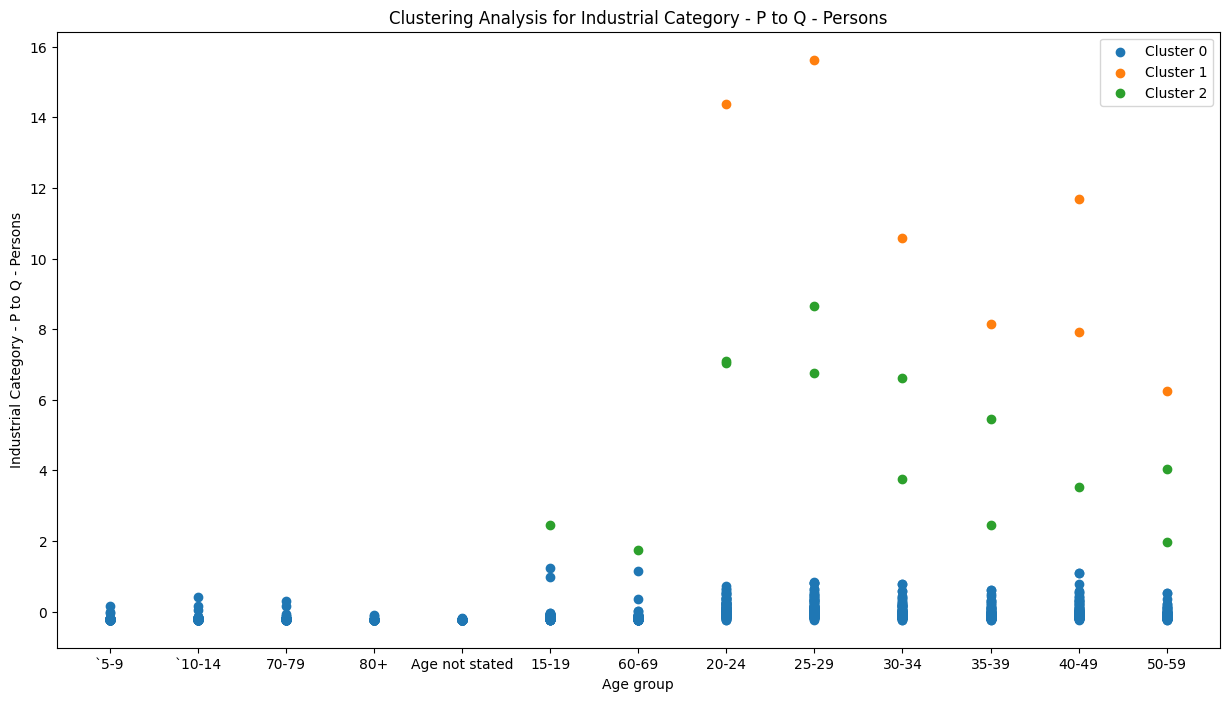

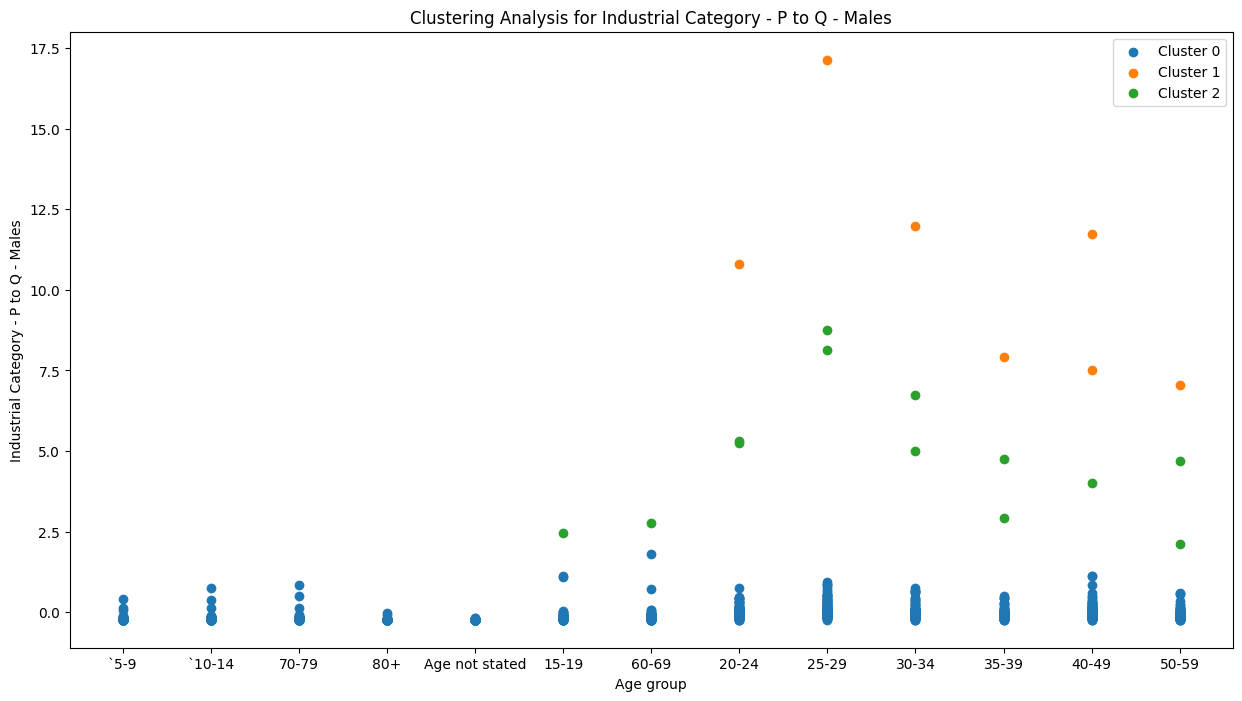

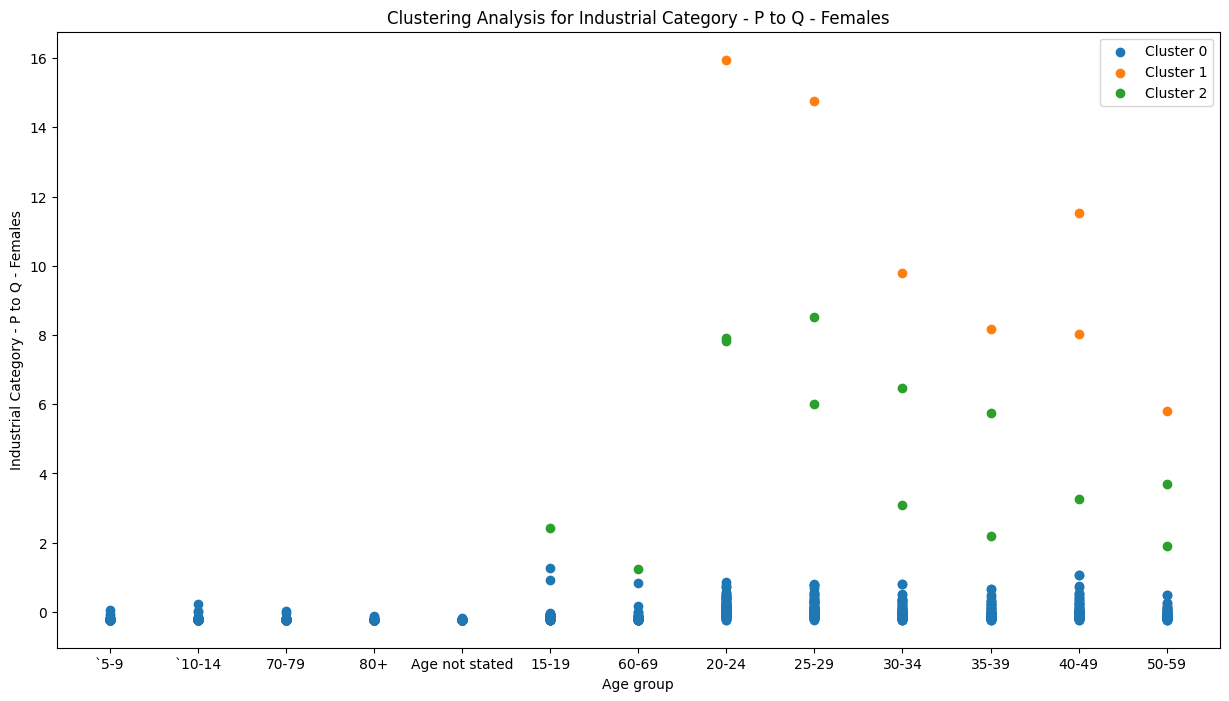

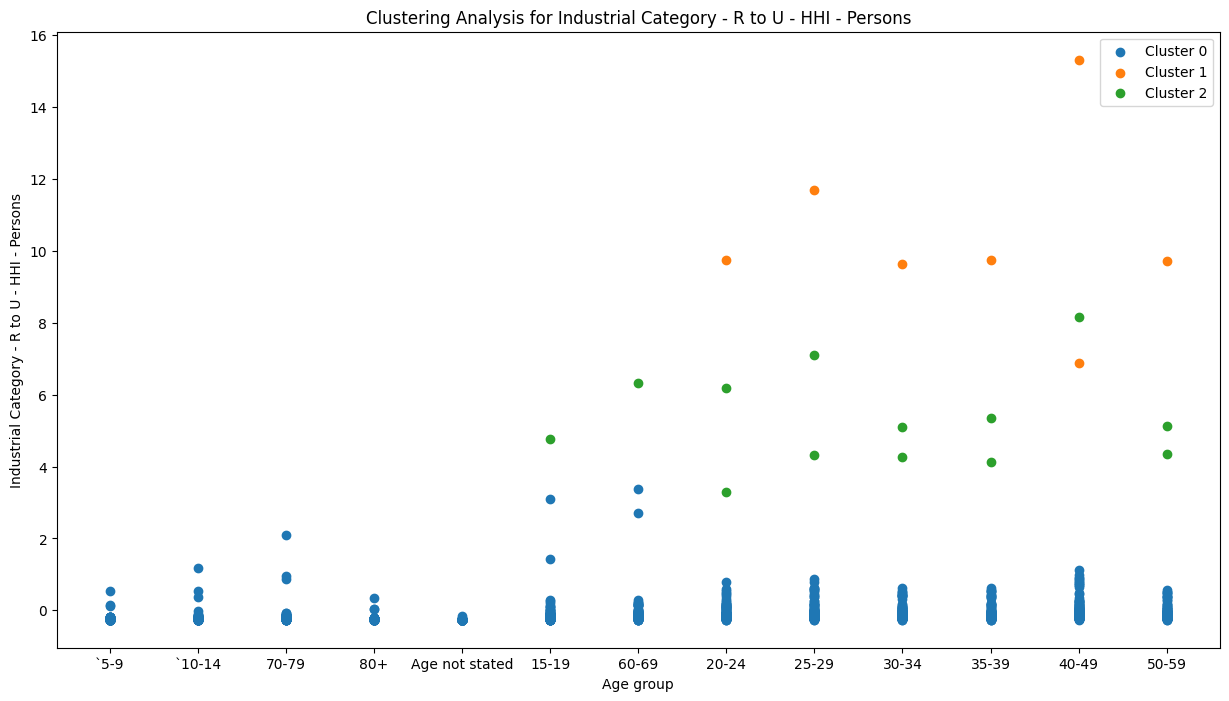

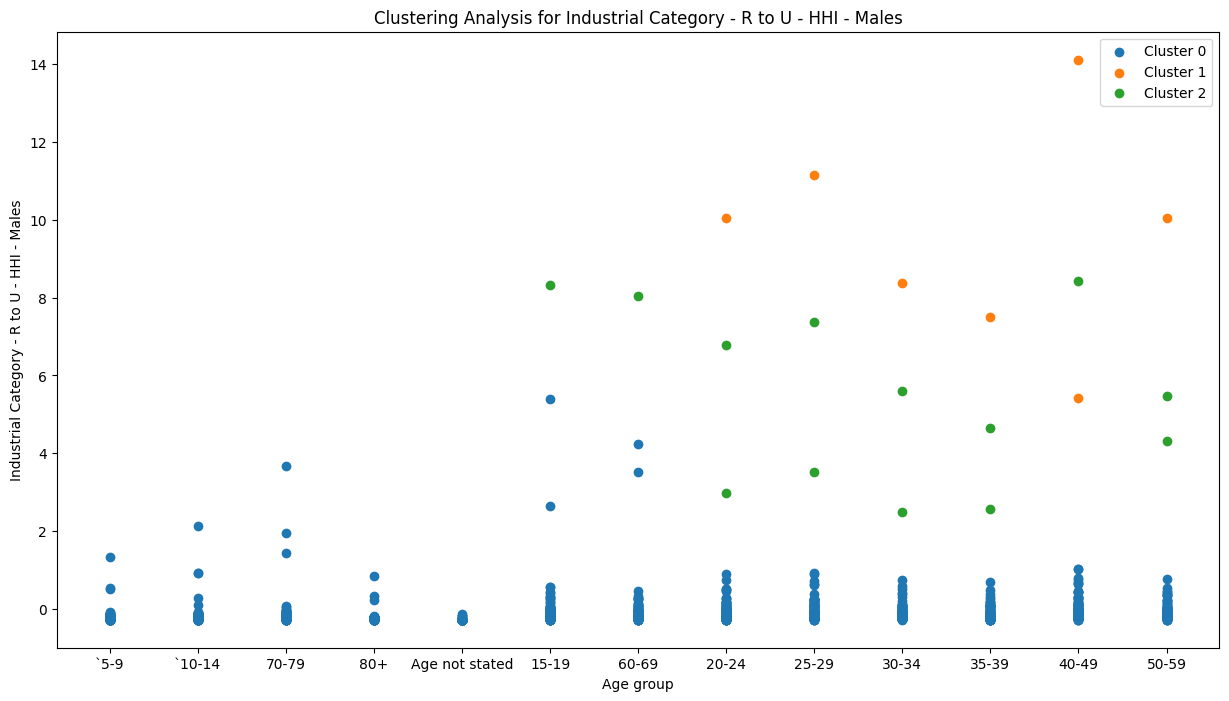

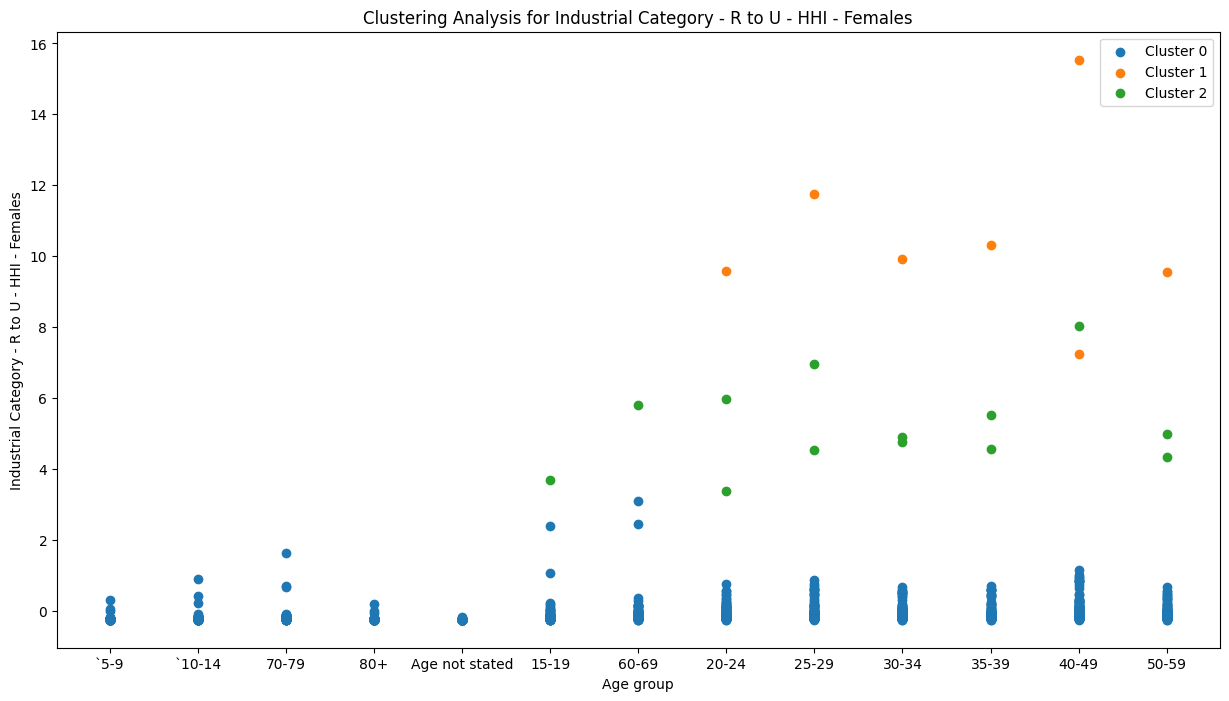

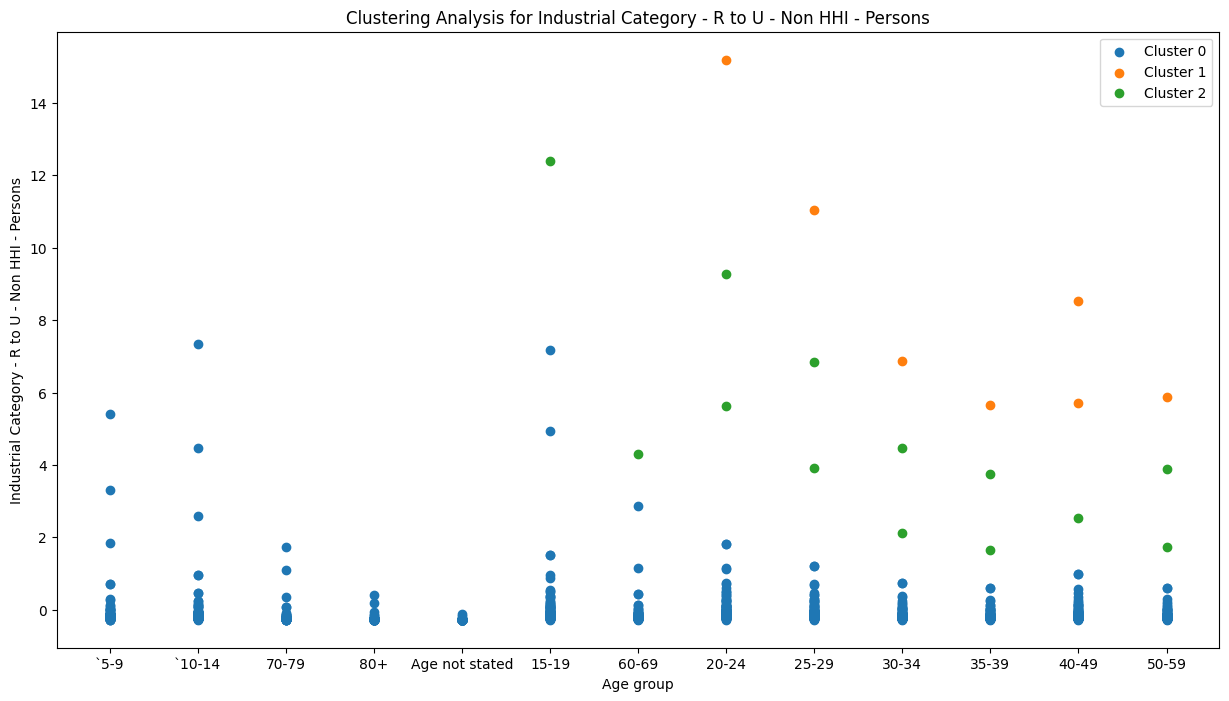

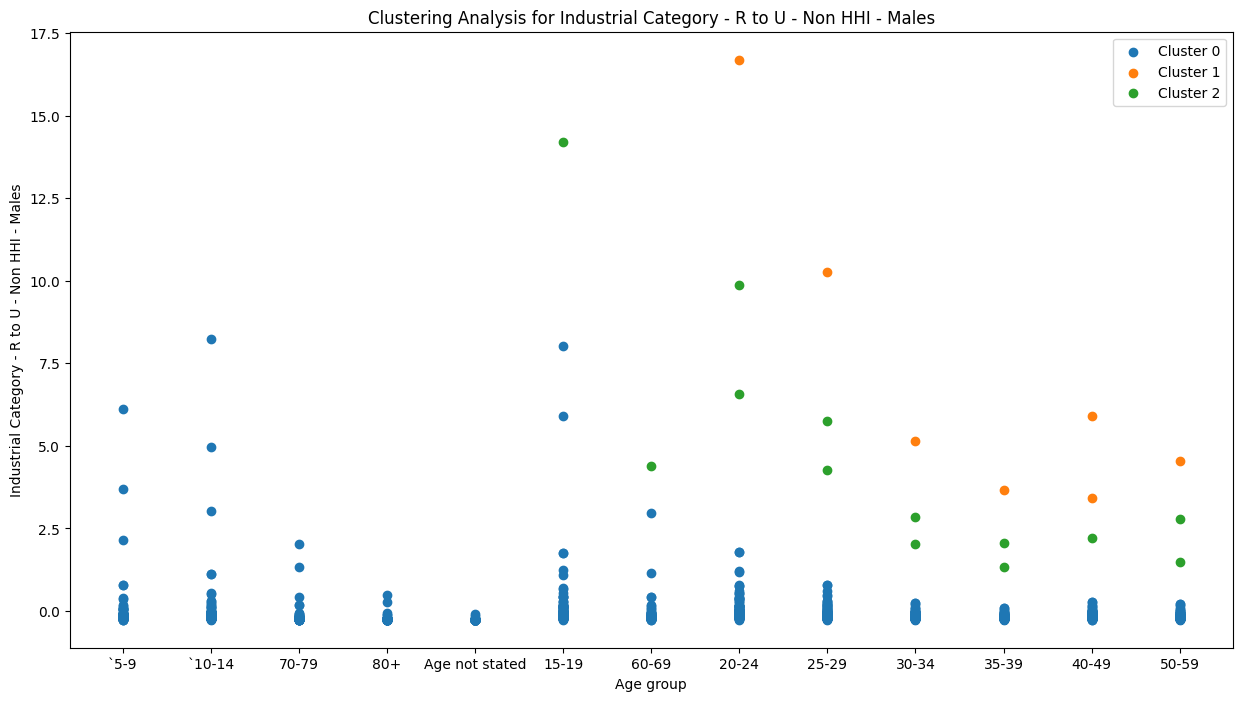

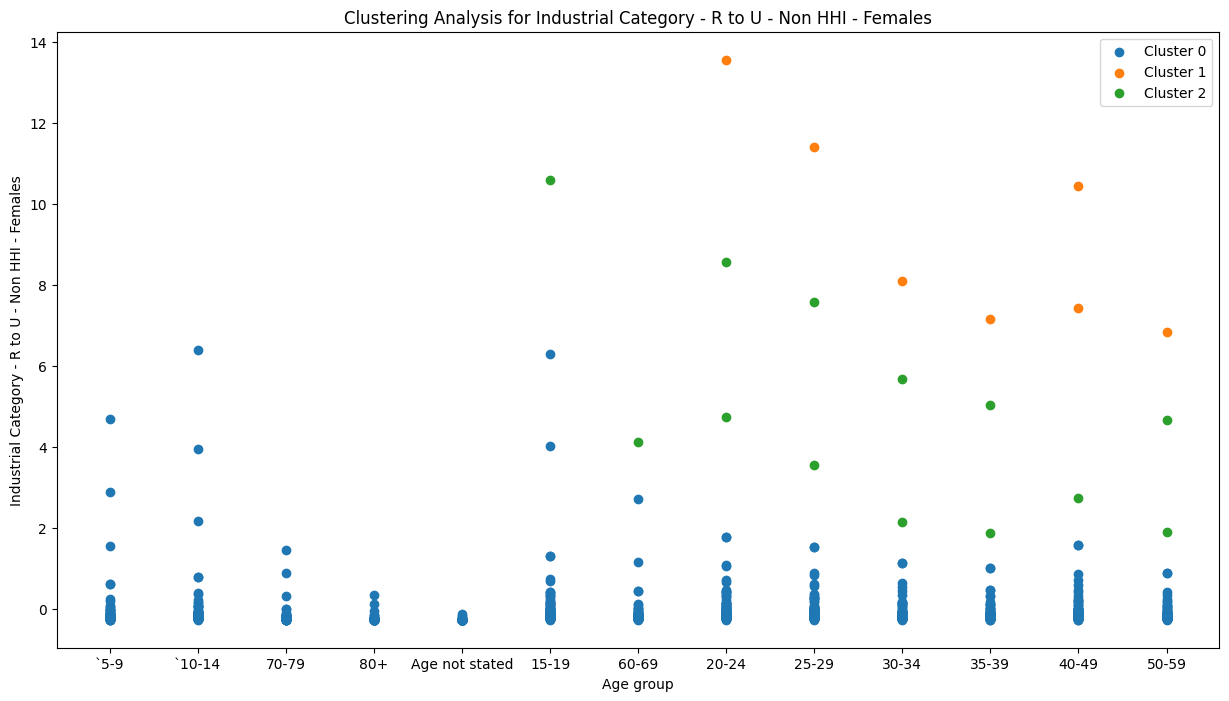

In [ ]:
#  CLUSTERING OF AGE GROUPS AND INDUSTRIAL GROUPS INCLUDING MALES AND FEMALES CATEGORIES

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (replace 'your_dataset_path' with the actual path)
df = pd.read_csv('marginal_workers_tamil_nadu.csv.csv')

# Data Cleaning and Exploration
numeric_columns = ['Industrial Category - A - Cultivators - Persons', 'Industrial Category - A - Cultivators - Males',
    'Industrial Category - A - Cultivators - Females', 'Industrial Category - B - Persons',
    'Industrial Category - B - Males', 'Industrial Category - B - Females',
    'Industrial Category - C - HHI - Males',
    'Industrial Category - C - HHI - Females',
    'Industrial Category - D & E - Males',
    'Industrial Category - D & E - Females',
    'Industrial Category - F - Persons',
    'Industrial Category - F - Males',
    'Industrial Category - F - Females',
    'Industrial Category - G - HHI - Persons',
    'Industrial Category - G - HHI - Males',
    'Industrial Category - G - HHI - Females',
    'Industrial Category - G - Non HHI - Persons',
    'Industrial Category - G - Non HHI - Males',
    'Industrial Category - G - Non HHI - Females',
    'Industrial Category - H - Persons',
    'Industrial Category - H - Males',
    'Industrial Category - H - Females',
    'Industrial Category - I - Persons',
    'Industrial Category - I - Males',
    'Industrial Category - I - Females',
    'Industrial Category - J - HHI - Persons',
    'Industrial Category - J - HHI - Males',
    'Industrial Category - J - HHI - Females',
    'Industrial Category - J - Non HHI - Persons',
    'Industrial Category - J - Non HHI - Males',
    'Industrial Category - J - Non HHI - Females',
    'Industrial Category - K to M - Persons',
    'Industrial Category - K to M - Males',
    'Industrial Category - K to M - Females',
    'Industrial Category - N to O - Persons',
    'Industrial Category - N to O - Males',
    'Industrial Category - N to O - Females',
    'Industrial Category - P to Q - Persons',
    'Industrial Category - P to Q - Males',
    'Industrial Category - P to Q - Females',
    'Industrial Category - R to U - HHI - Persons',
    'Industrial Category - R to U - HHI - Males',
    'Industrial Category - R to U - HHI - Females',
    'Industrial Category - R to U - Non HHI - Persons',
    'Industrial Category - R to U - Non HHI - Males',
    'Industrial Category - R to U - Non HHI - Females'
    # List of your numeric column names

]

# Convert columns to numeric, handling errors as NaN
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Exclude rows where 'Age group' is "Total"
df = df[df['Age group'] != 'Total']

# Standardizing Data
scaler = StandardScaler()
features = numeric_columns[1:]  # Use all the industrial categories (starting from the 2nd column)

df[features] = scaler.fit_transform(df[features])

# Applying K-Means Algorithm
n_clusters = 3  # Assuming you've determined the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])

# Scatter Plots for All Industrial Categories
for feature in features:
    plt.figure(figsize=(15, 8))

    for cluster in range(n_clusters):
        cluster_df = df[df['Cluster'] == cluster]
        plt.scatter(cluster_df['Age group'], cluster_df[feature], label=f'Cluster {cluster}')

    plt.xlabel('Age group')
    plt.ylabel(feature)
    plt.title(f'Clustering Analysis for {feature}')
    plt.legend()
    plt.show()

# Further steps for analysis and recommendations can be done here


In [ ]:
plt.savefig(f'cluster_plot_{feature}.png')
plt.close()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


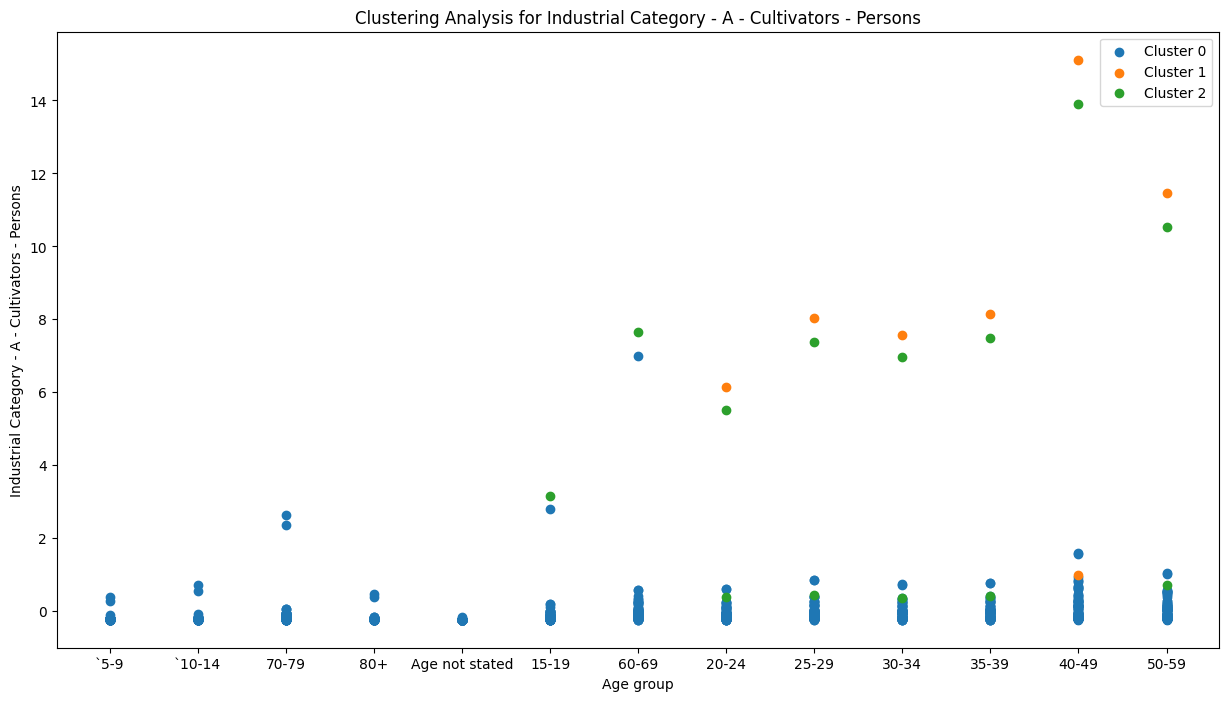

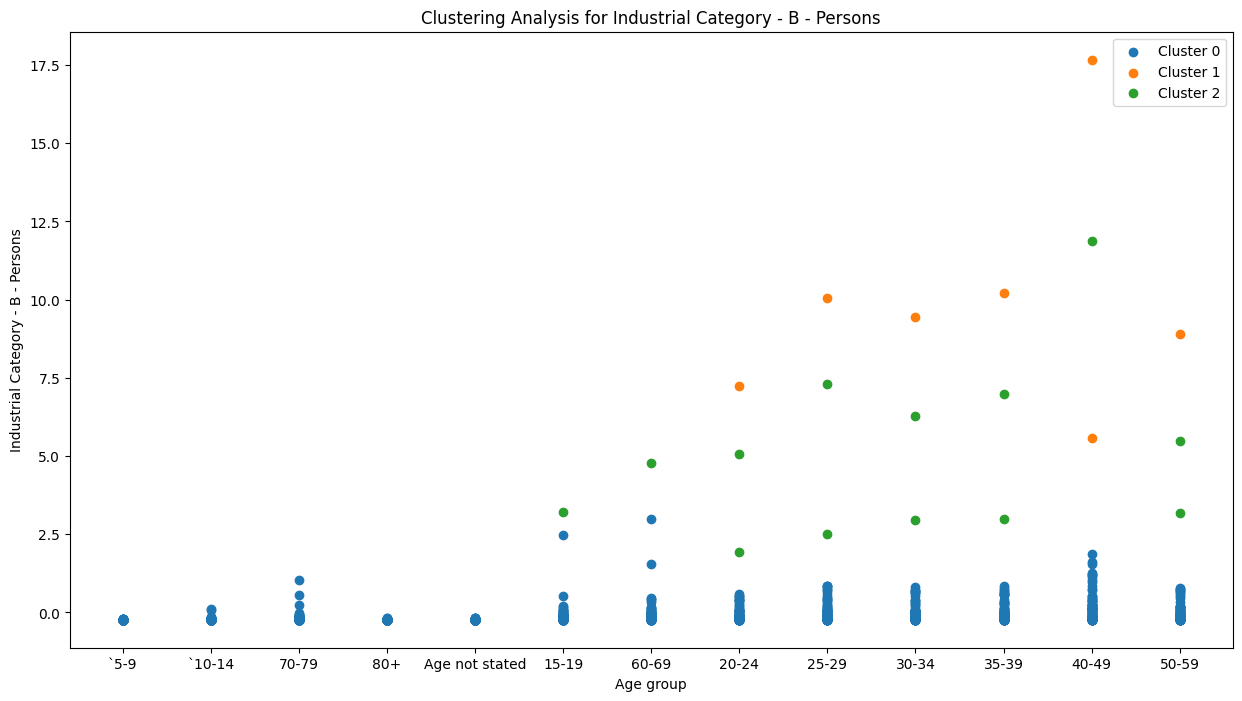

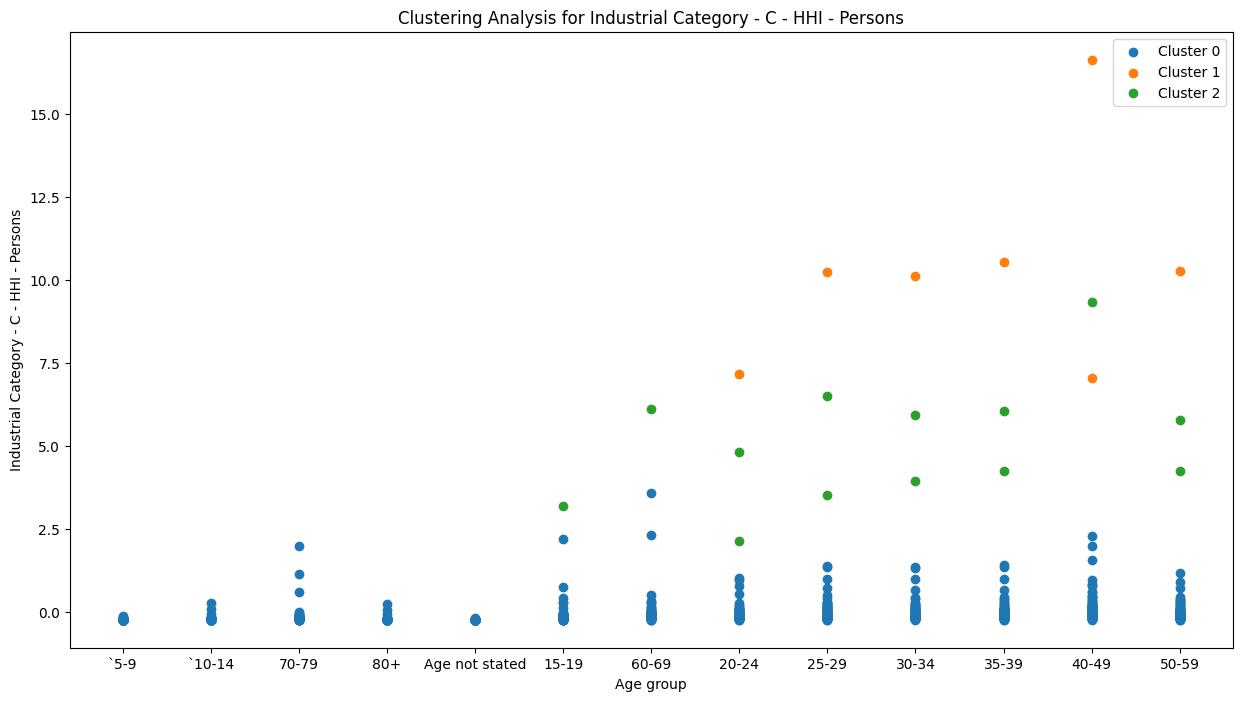

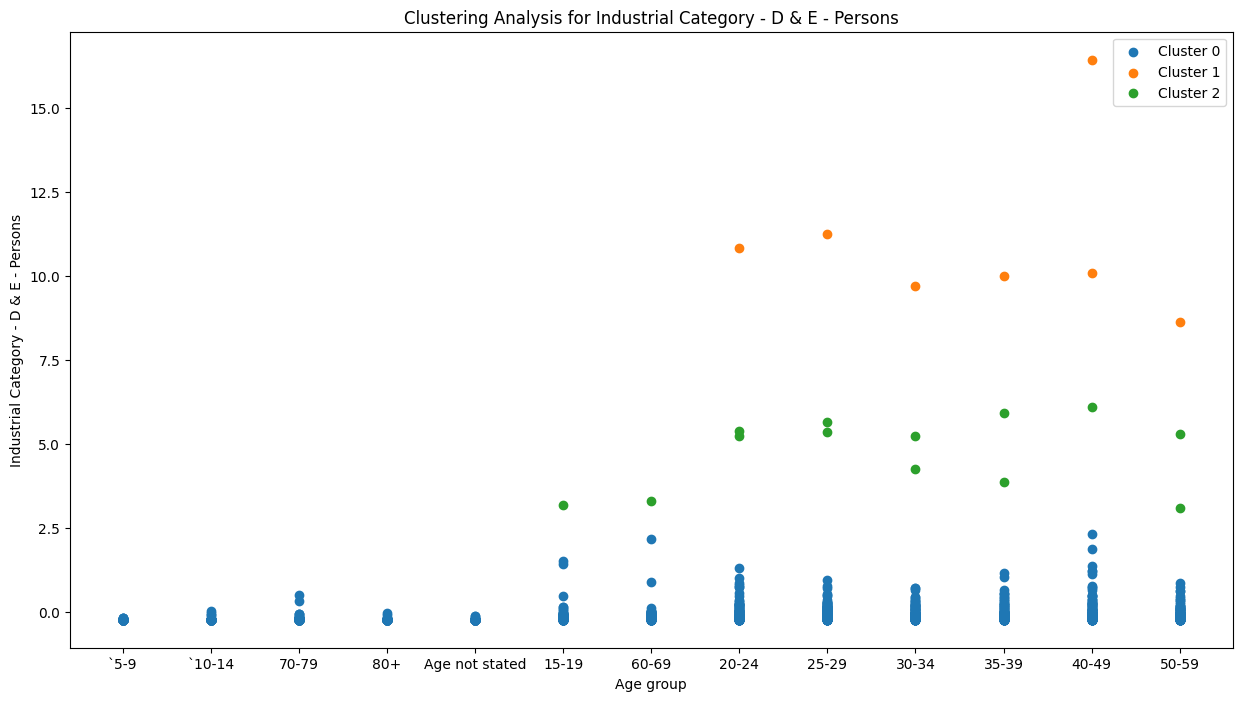

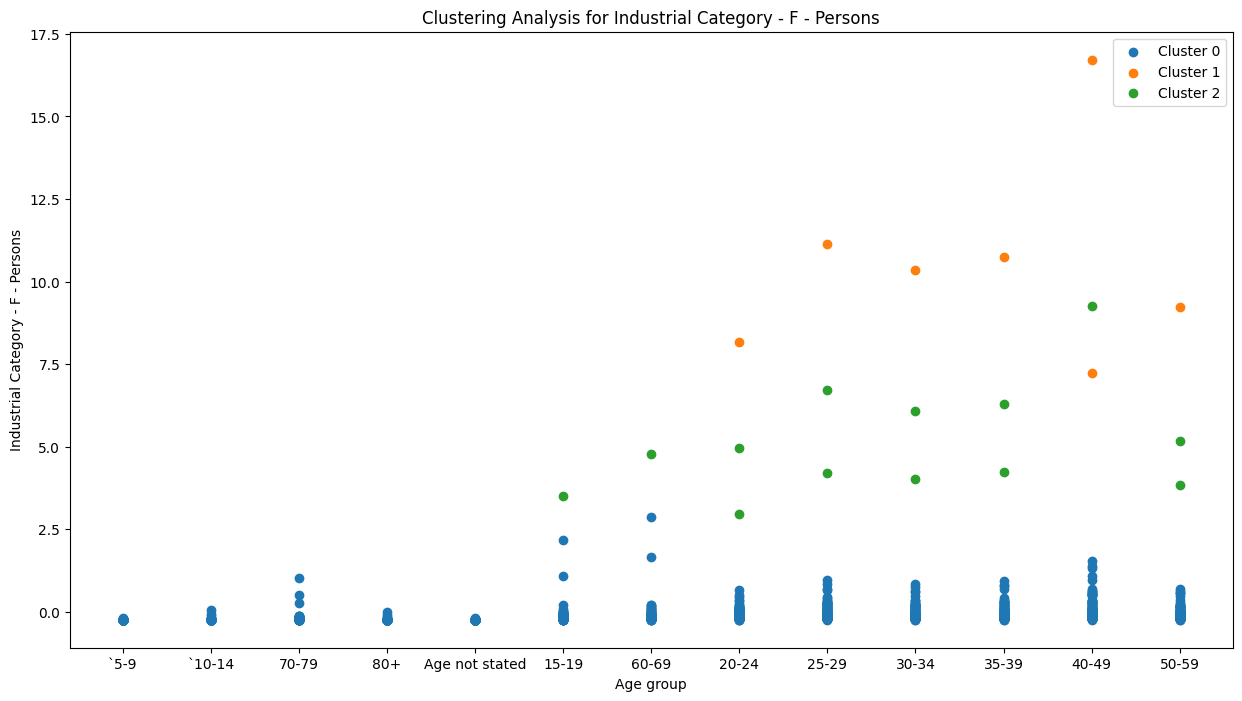

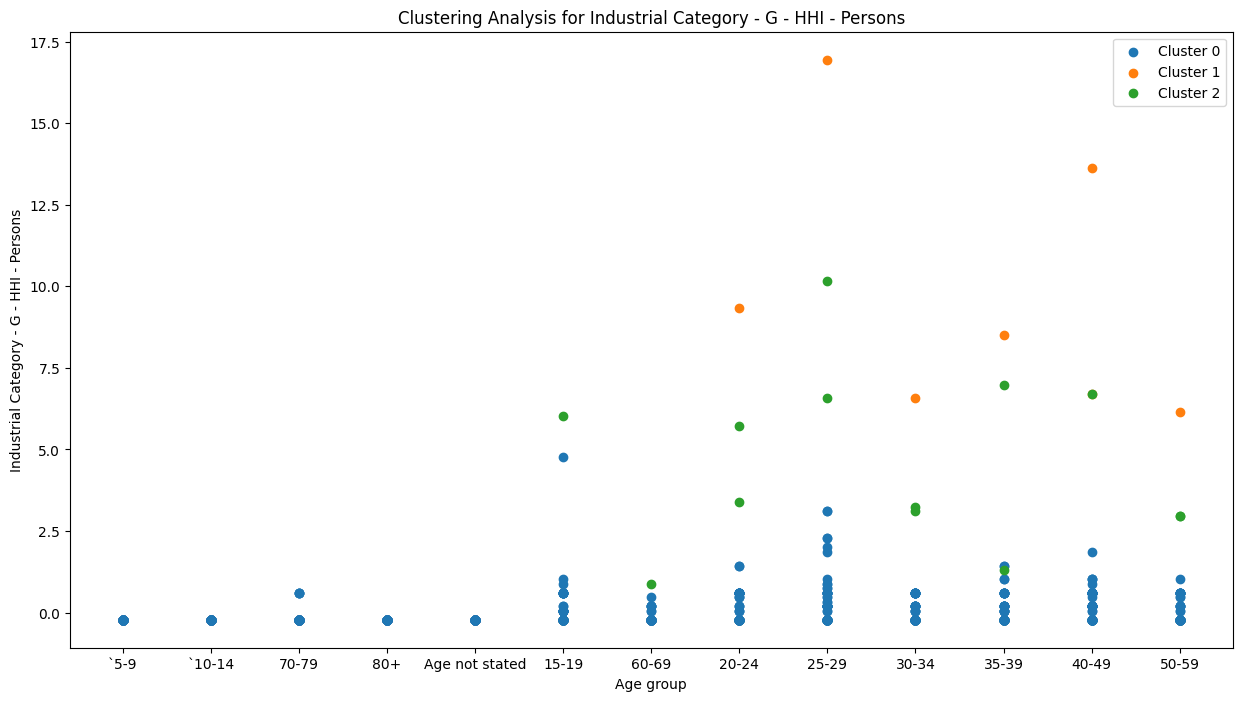

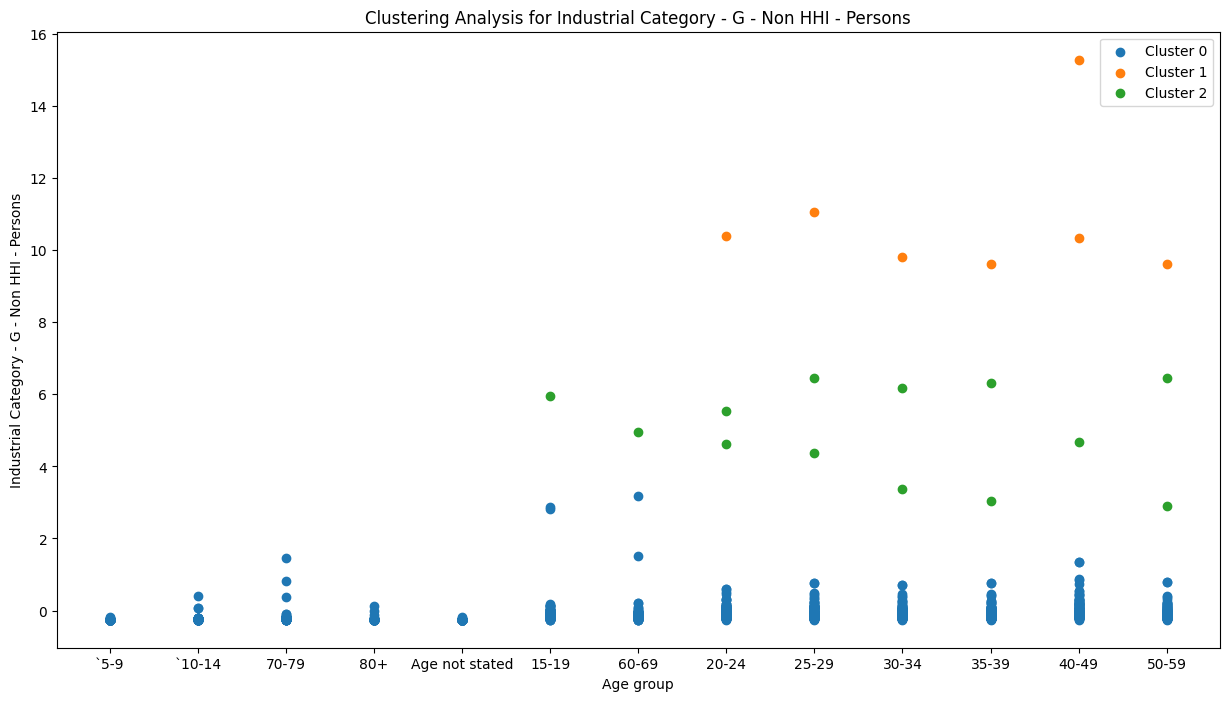

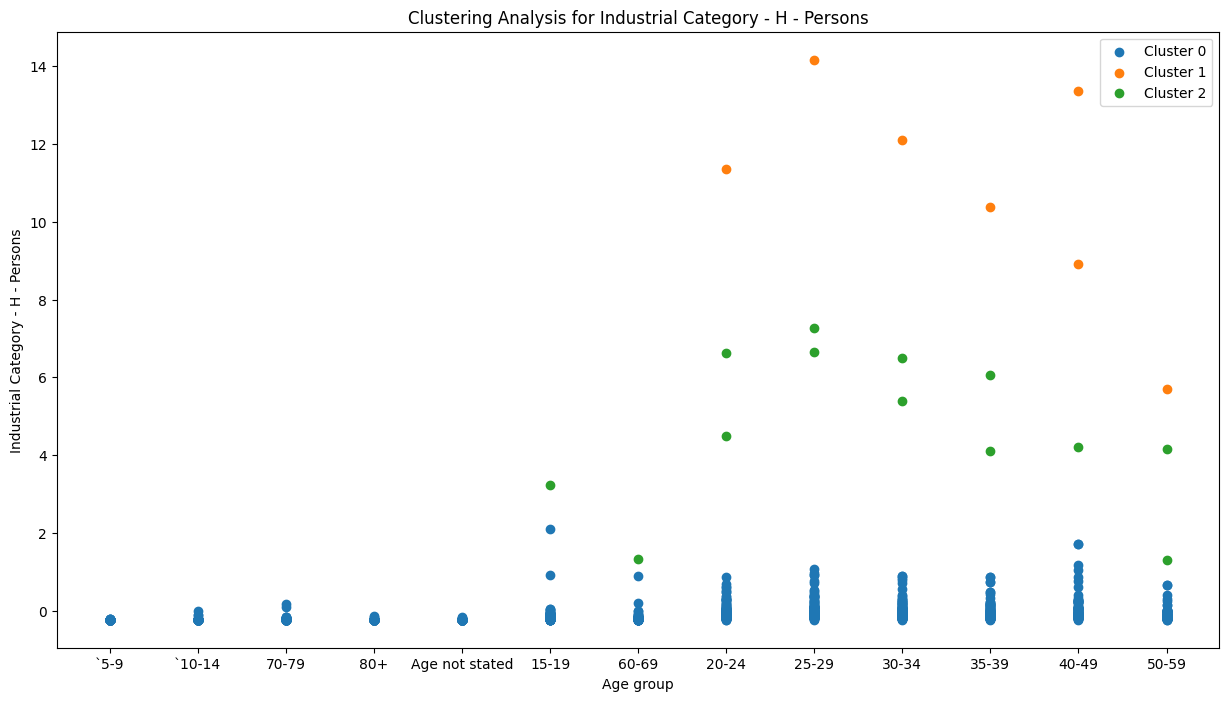

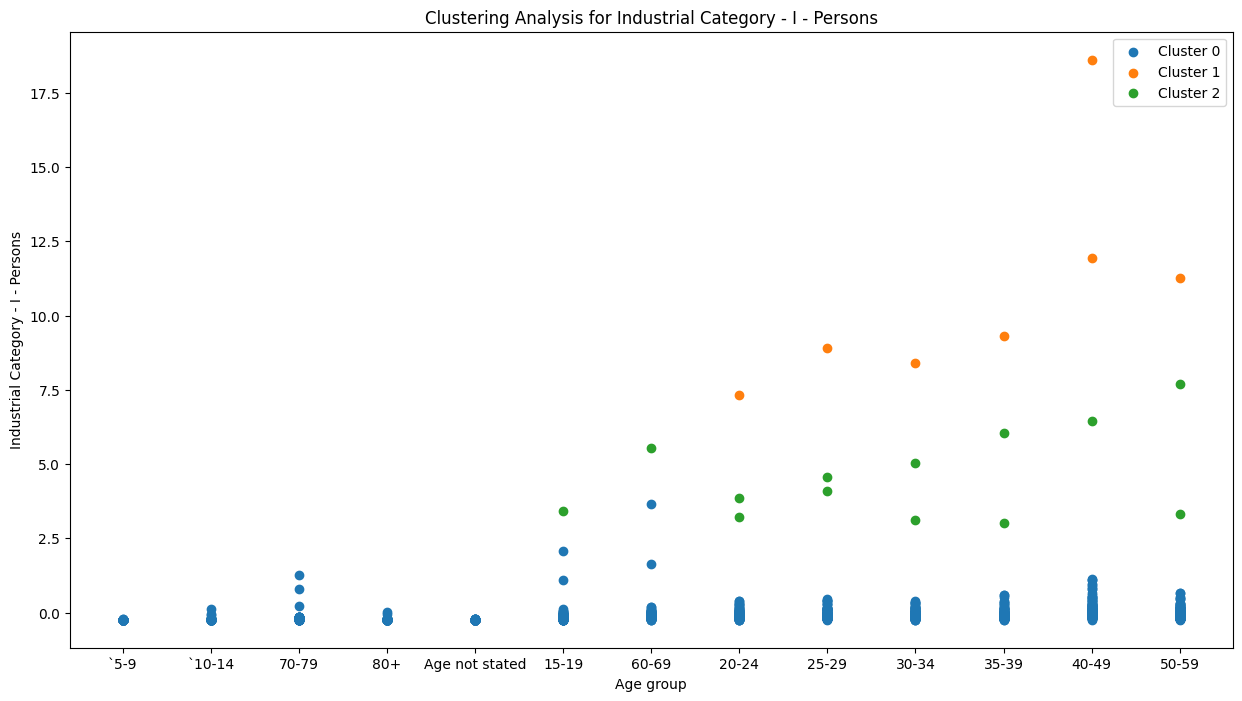

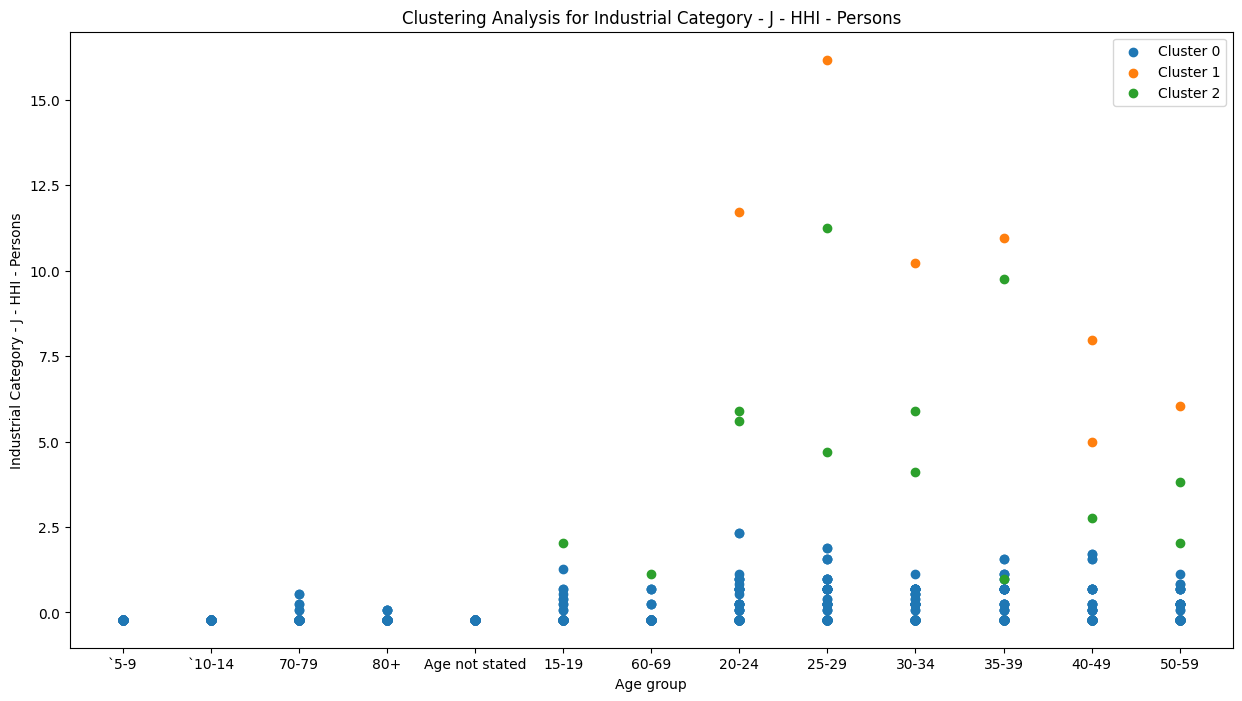

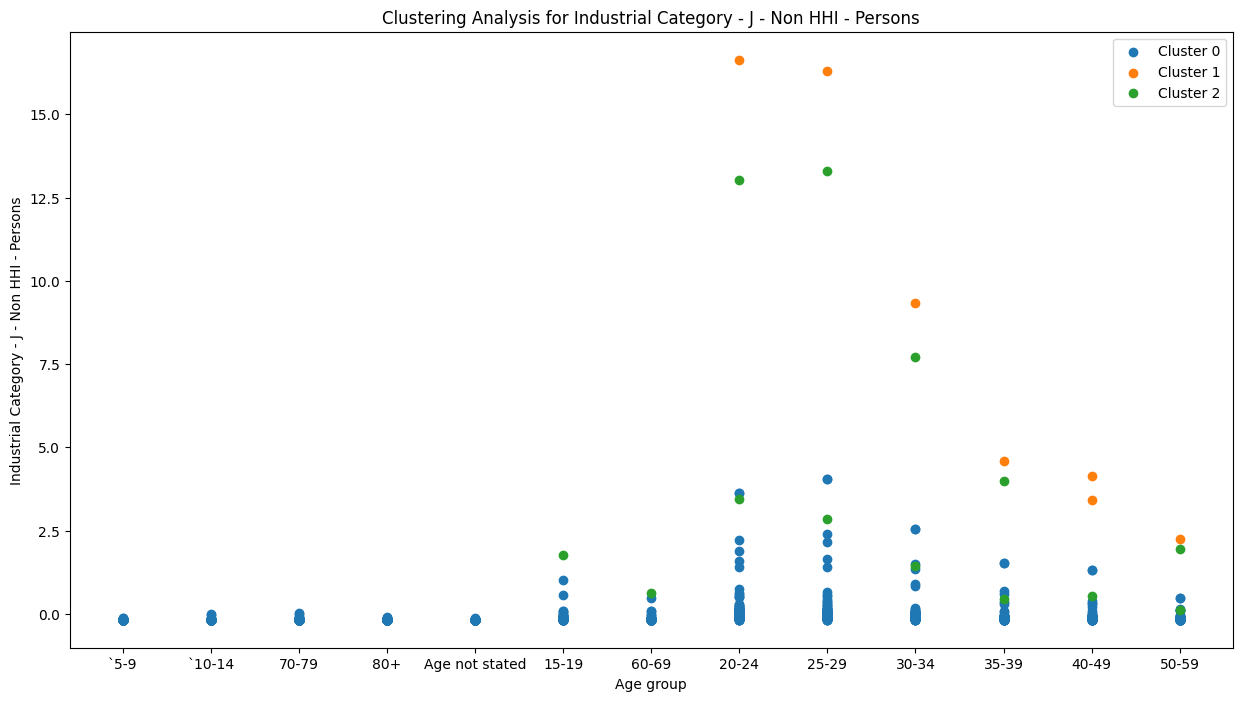

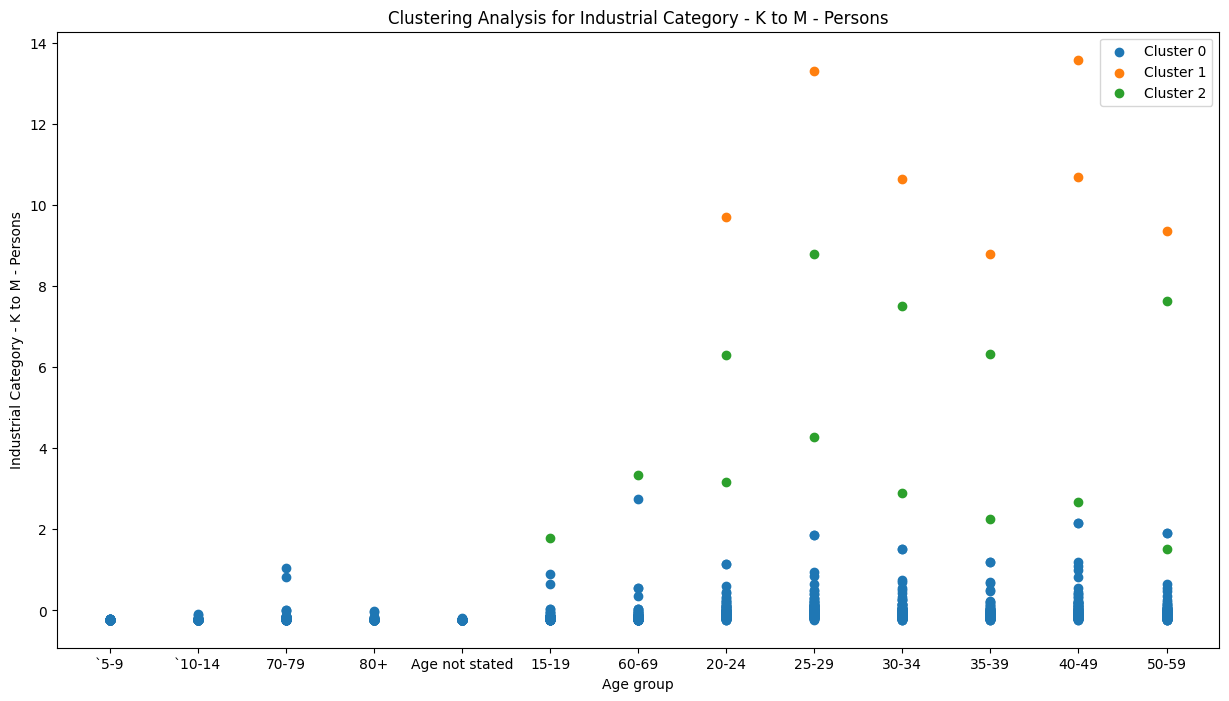

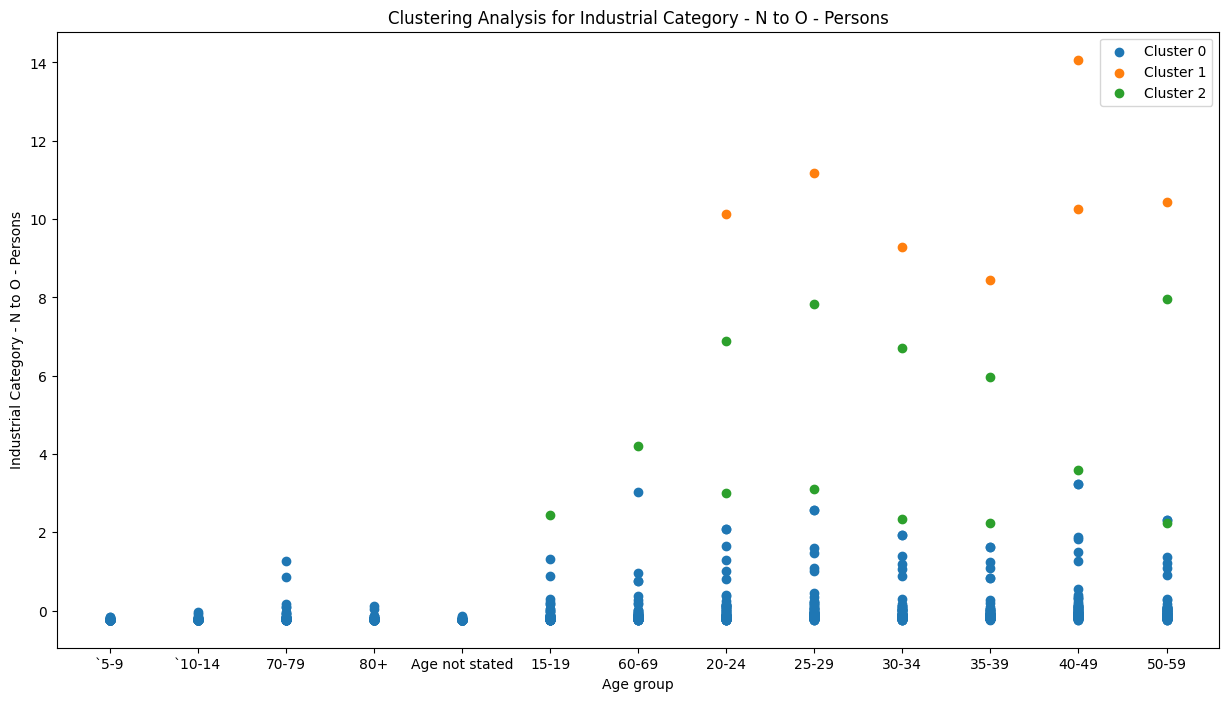

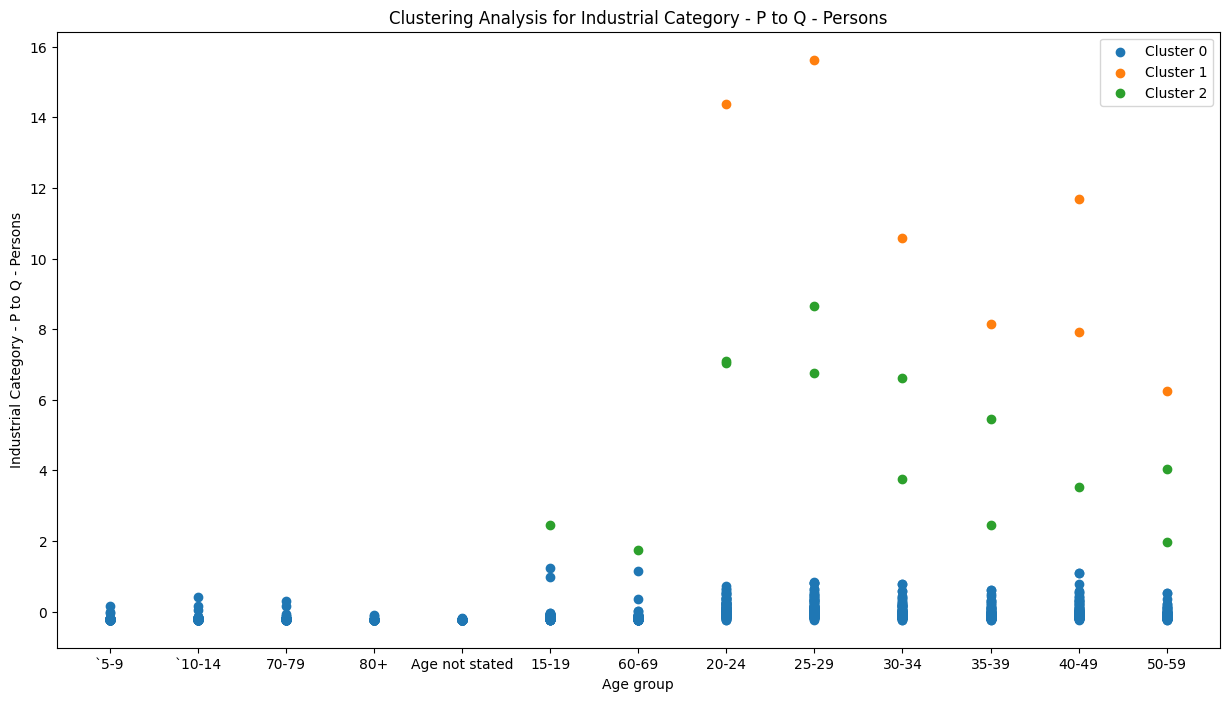

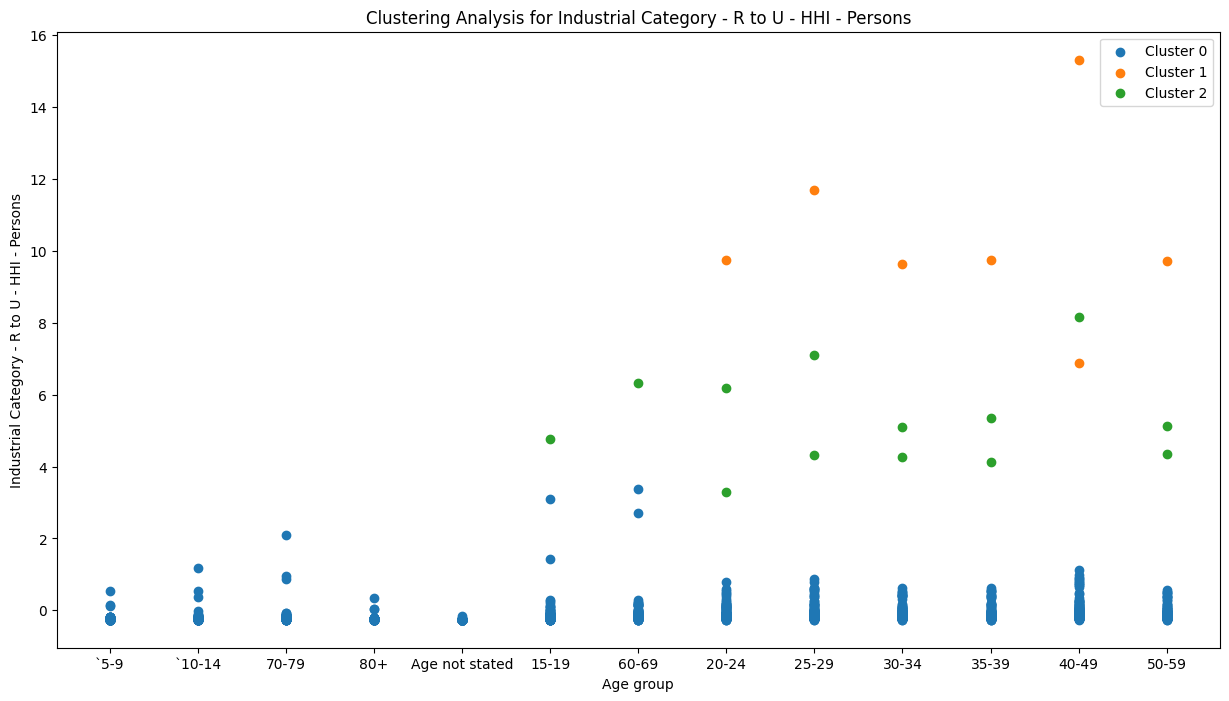

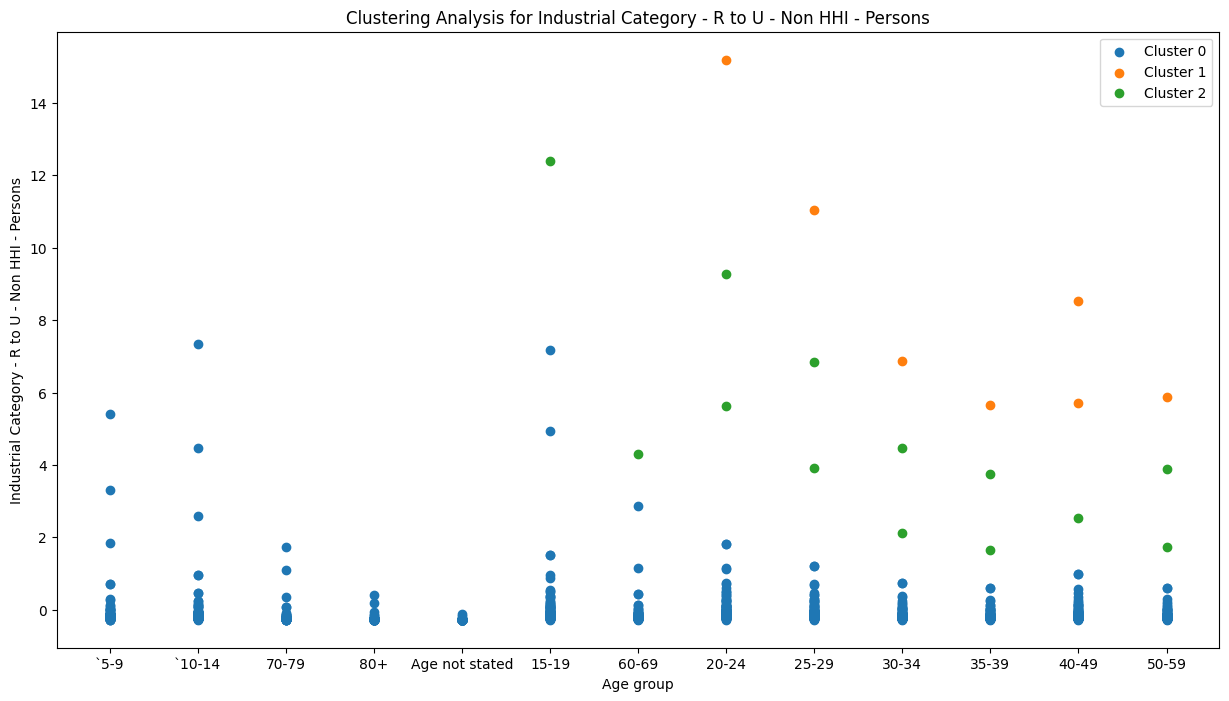

In [ ]:
#CLUSTERING ANALYSIS OF AGE GROUPS AND INDUSTRY CATEGORIES ONLY INCLUDING THE TOTAL PERSONS IN EACH CATEGORY

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (replace 'your_dataset_path' with the actual path)
df = pd.read_csv('marginal_workers_tamil_nadu.csv.csv')

# Data Cleaning and Exploration
numeric_columns = ['Industrial Category - A - Cultivators - Persons',
                   'Industrial Category - B - Persons',
                   'Industrial Category - C - HHI - Persons',
                   'Industrial Category - D & E - Persons',
                   'Industrial Category - F - Persons',
                   'Industrial Category - G - HHI - Persons',
                   'Industrial Category - G - Non HHI - Persons',
                   'Industrial Category - H - Persons',
                   'Industrial Category - I - Persons',
                   'Industrial Category - J - HHI - Persons',
                   'Industrial Category - J - Non HHI - Persons',
                   'Industrial Category - K to M - Persons',
                   'Industrial Category - N to O - Persons',
                   'Industrial Category - P to Q - Persons',
                   'Industrial Category - R to U - HHI - Persons',
                   'Industrial Category - R to U - Non HHI - Persons'
                   ]

# Convert columns to numeric, handling errors as NaN
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Exclude rows where 'Age group' is "Total"
df = df[df['Age group'] != 'Total']

# Standardizing Data
scaler = StandardScaler()
features = numeric_columns[:]  # Use all the industrial categories
df[features] = scaler.fit_transform(df[features])

# Applying K-Means Algorithm
n_clusters = 3  # Assuming you've determined the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])

# Scatter Plots for All Industrial Categories
for feature in features:
    plt.figure(figsize=(15, 8))

    for cluster in range(n_clusters):
        cluster_df = df[df['Cluster'] == cluster]
        plt.scatter(cluster_df['Age group'], cluster_df[feature], label=f'Cluster {cluster}')

    plt.xlabel('Age group')
    plt.ylabel(feature)
    plt.title(f'Clustering Analysis for {feature}')
    plt.legend()
    plt.show()

    plt.savefig(f'cluster_plot_{feature}.png')
    plt.close()


# Further steps for analysis and recommendations can be done here


In [ ]:
from google.colab import drive
drive.mount('/content/drive')